In [ ]:
from google.colab import files
from google.colab import drive
import os
import shutil
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB1, MobileNetV2
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mob_preprocess
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import joblib
from sklearn.model_selection import RandomizedSearchCV




main_dir = '/content/drive/MyDrive/TeaLeafDataset'
tealeafbd_dir = os.path.join(main_dir, 'teaLeafBD')
split_dir = os.path.join(main_dir, 'TeaLeafBD_Split')
resized_dir = os.path.join(main_dir, 'TeaLeafBD_Resized')
augmented_dir = os.path.join(main_dir, 'TeaLeafBD_Augmented')
model_dir = '/content/drive/MyDrive/TeaLeafModels'
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Download the Data into Drive

# Data Preparation

## Check the content of tealeafBD

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset in your Google Drive
data_dir = "/content/drive/MyDrive/TeaLeafDataset"

# Check if the directory exists
if os.path.exists(data_dir):
    print(f"Dataset found at: {data_dir}")
else:
    print(f"Dataset not found at: {data_dir}")
    print("Please check the path and make sure the dataset is in your Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset found at: /content/drive/MyDrive/TeaLeafDataset


In [ ]:
import os

# Define the path to the teaLeafBD directory
tealeafbd_dir = os.path.join(data_dir, "teaLeafBD")

# Check if the directory exists
if os.path.exists(tealeafbd_dir):
    print(f"Contents of {tealeafbd_dir}:")
    for item in os.listdir(tealeafbd_dir):
        print(item)
else:
    print(f"Directory not found: {tealeafbd_dir}")

Contents of /content/drive/MyDrive/TeaLeafDataset/teaLeafBD:
1. Tea algal leaf spot
2. Brown Blight
3. Gray Blight
4. Helopeltis
5. Red spider
6. Green mirid bug
7. Healthy leaf


In [ ]:
import os

# Define the path to the teaLeafBD directory
tealeafbd_dir = os.path.join(data_dir, "teaLeafBD")

# Check if the directory exists
if os.path.exists(tealeafbd_dir):
    print(f"Number of samples per class in {tealeafbd_dir}:")
    for item_name in os.listdir(tealeafbd_dir):
        item_path = os.path.join(tealeafbd_dir, item_name)
        if os.path.isdir(item_path):
            num_samples = len(os.listdir(item_path))
            print(f"- {item_name}: {num_samples} samples")
else:
    print(f"Directory not found: {tealeafbd_dir}")

Number of samples per class in /content/drive/MyDrive/TeaLeafDataset/teaLeafBD:
- 1. Tea algal leaf spot: 418 samples
- 2. Brown Blight: 506 samples
- 3. Gray Blight: 1013 samples
- 4. Helopeltis: 607 samples
- 5. Red spider: 515 samples
- 6. Green mirid bug: 1282 samples
- 7. Healthy leaf: 935 samples


## Stratified Spliting

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
output_dir = '/content/drive/MyDrive/TeaLeafDataset/TeaLeafBD_Split'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

In [ ]:
for class_name in os.listdir(tealeafbd_dir):
    class_path = os.path.join(tealeafbd_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # List all images for this class
    images = os.listdir(class_path)
    images = [os.path.join(class_path, img) for img in images if img.lower().endswith(('.jpg', '.png', '.jpeg'))]

    # 1Split train (70%) and temp (30%)
    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42, stratify=None)

    # Split temp into val (20%) and test (10%) → meaning val = 2/3 of temp, test = 1/3 of temp
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=1/3, random_state=42, stratify=None)

    # Make subfolders per class
    for folder in [train_dir, val_dir, test_dir]:
        os.makedirs(os.path.join(folder, class_name), exist_ok=True)

    # Copy images
    for img in train_imgs:
        shutil.copy(img, os.path.join(train_dir, class_name))
    for img in val_imgs:
        shutil.copy(img, os.path.join(val_dir, class_name))
    for img in test_imgs:
        shutil.copy(img, os.path.join(test_dir, class_name))

    print(f"{class_name}: {len(train_imgs)} train, {len(val_imgs)} val, {len(test_imgs)} test")

1. Tea algal leaf spot: 292 train, 84 val, 42 test
2. Brown Blight: 354 train, 101 val, 51 test
3. Gray Blight: 709 train, 202 val, 102 test
4. Helopeltis: 424 train, 122 val, 61 test
5. Red spider: 360 train, 103 val, 52 test
6. Green mirid bug: 897 train, 256 val, 129 test
7. Healthy leaf: 654 train, 187 val, 94 test


## Image Resizing

In [ ]:
target_size = (224, 224)

# start resizing
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(os.path.join(split_dir, split)):
        input_class_dir = os.path.join(split_dir, split, class_name)
        output_class_dir = os.path.join(resized_dir, split, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        for img_name in os.listdir(input_class_dir):
            input_img = os.path.join(input_class_dir, img_name)
            output_img = os.path.join(output_class_dir, img_name)
            try:
                with Image.open(input_img) as img:
                    img = img.convert("RGB")  # ensure color consistency
                    img = img.resize(target_size, Image.LANCZOS)
                    img.save(output_img)
            except Exception as e:
                print(f"Error resizing {input_img}: {e}")

Showing samples from class: 7. Healthy leaf


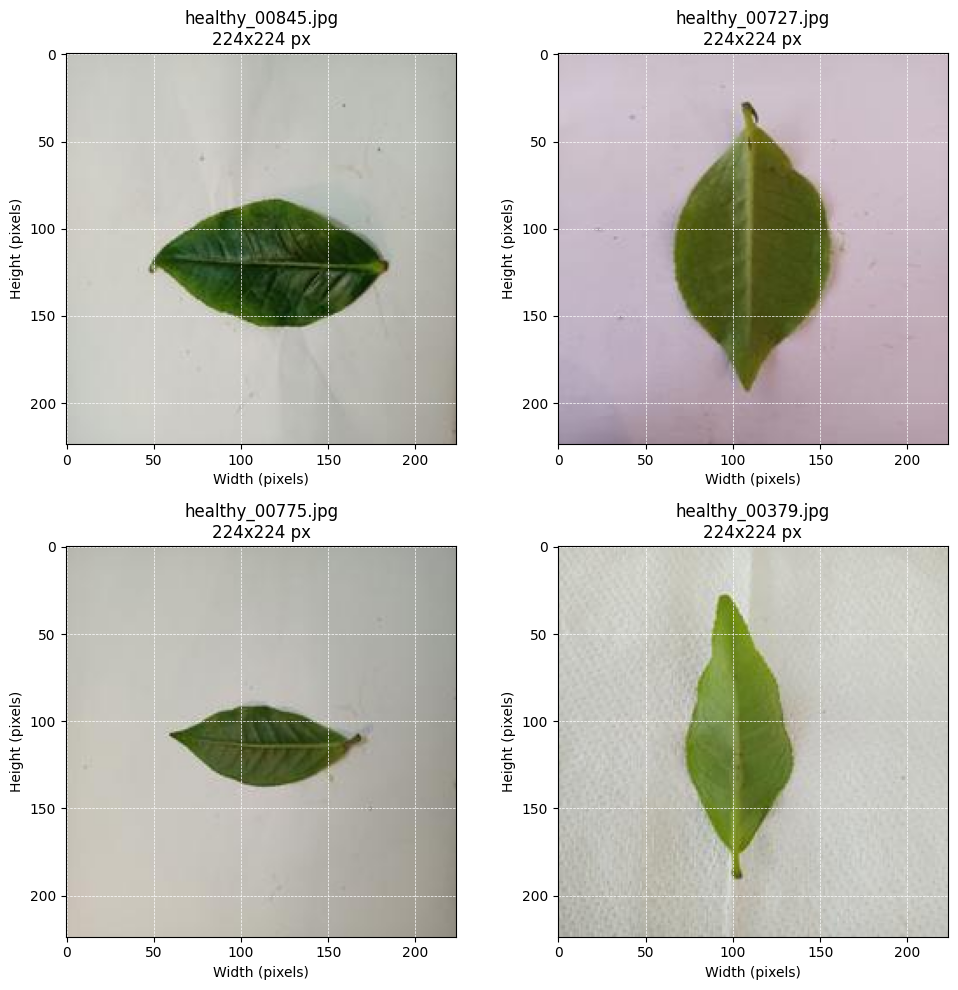

In [ ]:
check_dir = '/content/drive/MyDrive/TeaLeafDataset/TeaLeafBD_Resized/train'

# Path to your resized dataset
classes = os.listdir(check_dir)

# Choose a random class and a few random images
sample_class = random.choice(classes)
sample_folder = os.path.join(check_dir, sample_class)
sample_images = random.sample(os.listdir(sample_folder), 4)  # show 4 samples

print(f"Showing samples from class: {sample_class}")

# Show image with grid and axes
plt.figure(figsize=(10,10))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_folder, img_name)
    img = Image.open(img_path)

    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(f"{img_name}\n{img.size[0]}x{img.size[1]} px")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.grid(True, color='white', linestyle='--', linewidth=0.5)
    plt.xticks(range(0, img.size[0]+1, 50))
    plt.yticks(range(0, img.size[1]+1, 50))

plt.tight_layout()
plt.show()

In [ ]:
check_dirs = [
    os.path.join(resized_dir, "train"),
    os.path.join(resized_dir, "val"),
    os.path.join(resized_dir, "test")
]

expected_size = (224, 224)
invalid_images = []

for dir in check_dirs:
    for class_name in os.listdir(dir):
        class_path = os.path.join(dir, class_name)
        if not os.path.isdir(class_path):
            continue
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    if img.size != expected_size:
                        invalid_images.append((img_path, img.size))
            except Exception as e:
                print(f"⚠️ Error reading {img_path}: {e}")

# --- Summary ---
if len(invalid_images) == 0:
    print("✅ All images are correctly resized to 224×224 pixels.")
else:
    print(f"❌ Found {len(invalid_images)} images not sized 224×224:")
    for path, size in invalid_images[:10]:  # show first 10 only
        print(f"  {path} — {size}")
    print("Check the above files for resizing issues.")

✅ All images are correctly resized to 224×224 pixels.


## Binary (Healthy or Disease Leaves)

In [ ]:
import os, shutil
from tqdm import tqdm

splits = ['train', 'val', 'test']

for split in splits:
    split_dir = os.path.join(resized_dir, split)
    new_split_dir = os.path.join(resized_dir, split + '_binary')
    os.makedirs(os.path.join(new_split_dir, 'healthy'), exist_ok=True)
    os.makedirs(os.path.join(new_split_dir, 'disease'), exist_ok=True)

    print(f"\nProcessing {split} set...")
    for cls in os.listdir(split_dir):
        cls_path = os.path.join(split_dir, cls)
        if not os.path.isdir(cls_path):
            continue

        # determine destination folder
        if cls == '7. Healthy leaf':
            dest_folder = os.path.join(new_split_dir, 'healthy')
        else:
            dest_folder = os.path.join(new_split_dir, 'disease')

        # copy all images
        for img in tqdm(os.listdir(cls_path), desc=f"{cls} → {os.path.basename(dest_folder)}"):
            src = os.path.join(cls_path, img)
            dst = os.path.join(dest_folder, img)
            shutil.copy(src, dst)

print("\n✅ Binary dataset created successfully: 'healthy' vs 'disease'")


Processing train set...


7. Healthy leaf → healthy: 100%|██████████| 654/654 [00:09<00:00, 67.84it/s]



Processing val set...


7. Healthy leaf → healthy: 100%|██████████| 187/187 [00:03<00:00, 57.97it/s]



Processing test set...


7. Healthy leaf → healthy: 100%|██████████| 94/94 [00:28<00:00,  3.34it/s]


✅ Binary dataset created successfully: 'healthy' vs 'disease'


## Image Augmentation (Multiclass)

In [ ]:
import tensorflow as tf
import os
import shutil
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np

# --- Define directories ---
train_dir = os.path.join(resized_dir,"train")
augmented_dir = '/content/drive/MyDrive/TeaLeafDataset/TeaLeafBD_Augmented/train'

# Recreate new directory structure
if os.path.exists(augmented_dir):
    shutil.rmtree(augmented_dir)
os.makedirs(augmented_dir, exist_ok=True)

for class_name in os.listdir(train_dir):
    os.makedirs(os.path.join(augmented_dir, class_name), exist_ok=True)

# --- Define augmentation function ---
def augment_image(image):
    """Apply rotation, random crop, flip, contrast, and brightness."""

    # Rotation
    image = tf.image.rot90(image, k=np.random.randint(0, 4))  # 0°,90°,180°,270°

    # Random crop (e.g. crop 90% area then resize back to 224×224)
    crop_fraction = 0.7
    crop_size = int(224 * crop_fraction)
    image = tf.image.random_crop(image, size=[crop_size, crop_size, 3])
    image = tf.image.resize(image, [224, 224])

    # Random flip (horizontal and vertical)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    # Adjust contrast and brightness
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_brightness(image, max_delta=0.2)

    return tf.clip_by_value(image, 0, 255)  # keep valid pixel range

# --- Augment and save images ---
num_augmented_per_image = 2  # how many augmented images per original

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    save_path = os.path.join(augmented_dir, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)

            for i in range(num_augmented_per_image):
                aug_img = augment_image(img_array)
                aug_img_pil = array_to_img(aug_img)
                save_name = f"aug_{i}_{img_name}"
                aug_img_pil.save(os.path.join(save_path, save_name))
        except Exception as e:
            print(f"⚠️ Skipping {img_path}: {e}")

print(" Augmentation complete! Saved to:", augmented_dir)

 Augmentation complete! Saved to: /content/drive/MyDrive/TeaLeafDataset/TeaLeafBD_Augmented/train


In [ ]:
import tensorflow as tf
import os
import shutil
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
from tqdm import tqdm
import glob

# --- 1️⃣ Define directories ---
train_dir = os.path.join(resized_dir,"train")
augmented_dir = '/content/drive/MyDrive/TeaLeafDataset/TeaLeafBD_Augmented/train'

# --- 2️⃣ Clean and recreate augmentation folder ---
if os.path.exists(augmented_dir):
    shutil.rmtree(augmented_dir)
os.makedirs(augmented_dir, exist_ok=True)

# --- 3️⃣ Create class folders ---
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        os.makedirs(os.path.join(augmented_dir, class_name), exist_ok=True)

# --- 4️⃣ Define augmentation function ---
def augment_image(image):
    """Apply rotation, crop, flip, contrast, brightness."""
    image = tf.image.rot90(image, k=np.random.randint(0, 4))
    crop_fraction = 0.7
    crop_size = int(224 * crop_fraction)
    image = tf.image.random_crop(image, size=[crop_size, crop_size, 3])
    image = tf.image.resize(image, [224, 224])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_brightness(image, max_delta=0.2)
    return tf.clip_by_value(image, 0, 255)

# --- 5️⃣ Augmentation process ---
num_augmented_per_image = 2  # how many augmentations per image

for class_name in tqdm(os.listdir(train_dir), desc="Processing classes"):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):
        continue  # skip non-folders

    save_path = os.path.join(augmented_dir, class_name)
    os.makedirs(save_path, exist_ok=True)

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"\nClass '{class_name}' — total images: {len(images)}")

    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        try:
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)

            for i in range(num_augmented_per_image):
                aug_img = augment_image(img_array)
                aug_img_pil = array_to_img(aug_img)

                save_name = f"aug_{i}_{img_name}"
                save_target = os.path.join(save_path, save_name)

                # ✅ Double safety check: ensure image saved inside class folder
                if os.path.commonpath([save_target, augmented_dir]) == augmented_dir:
                    aug_img_pil.save(save_target)
                else:
                    print(f"⚠️ Unsafe path detected, skipping: {save_target}")

        except Exception as e:
            print(f"⚠️ Error processing {img_path}: {type(e).__name__} - {e}")

print("\n✅ Augmentation complete! Saved to:", augmented_dir)

# --- 6️⃣ Auto-cleanup step: delete any 'aug_' images outside target directory ---
root_dir = '/content/drive/MyDrive'  # or wherever your Colab main directory is
extra_aug_files = glob.glob(os.path.join(root_dir, "aug_*"))

if extra_aug_files:
    print(f"\n🧹 Found {len(extra_aug_files)} stray augmented files outside class folders.")
    for f in extra_aug_files:
        try:
            os.remove(f)
        except Exception as e:
            print(f"⚠️ Could not delete {f}: {e}")
    print("✅ Cleanup complete! All misplaced augmented images deleted.")
else:
    print("\n🧹 No stray augmented files found — all images are in correct folders.")

Processing classes:   0%|          | 0/7 [00:00<?, ?it/s]


Class '1. Tea algal leaf spot' — total images: 292


Processing classes:  14%|█▍        | 1/7 [00:16<01:39, 16.57s/it]


Class '2. Brown Blight' — total images: 354


Processing classes:  29%|██▊       | 2/7 [00:35<01:30, 18.13s/it]


Class '3. Gray Blight' — total images: 709


Processing classes:  43%|████▎     | 3/7 [01:16<01:54, 28.57s/it]


Class '4. Helopeltis' — total images: 424


Processing classes:  57%|█████▋    | 4/7 [01:41<01:21, 27.18s/it]


Class '5. Red spider' — total images: 360


Processing classes:  71%|███████▏  | 5/7 [02:06<00:52, 26.22s/it]


Class '6. Green mirid bug' — total images: 897


Processing classes:  86%|████████▌ | 6/7 [03:05<00:37, 37.38s/it]


Class '7. Healthy leaf' — total images: 654


Processing classes: 100%|██████████| 7/7 [03:41<00:00, 31.61s/it]


✅ Augmentation complete! Saved to: /content/drive/MyDrive/TeaLeafDataset/TeaLeafBD_Augmented/train

🧹 No stray augmented files found — all images are in correct folders.


In [ ]:
import os
import glob

# Path where the wrong augmented images were saved (usually your main directory)
base_dir = '/content/drive/MyDrive'   # ← adjust if needed

# Find all files that start with "aug_"
aug_files = glob.glob(os.path.join(base_dir, "aug_*"))

print(f"Found {len(aug_files)} augmented files to delete.")

# Delete them
for f in aug_files:
    try:
        os.remove(f)
    except Exception as e:
        print(f"⚠️ Could not delete {f}: {e}")

print("✅ All stray augmented images removed.")


Found 6799 augmented files to delete.
✅ All stray augmented images removed.


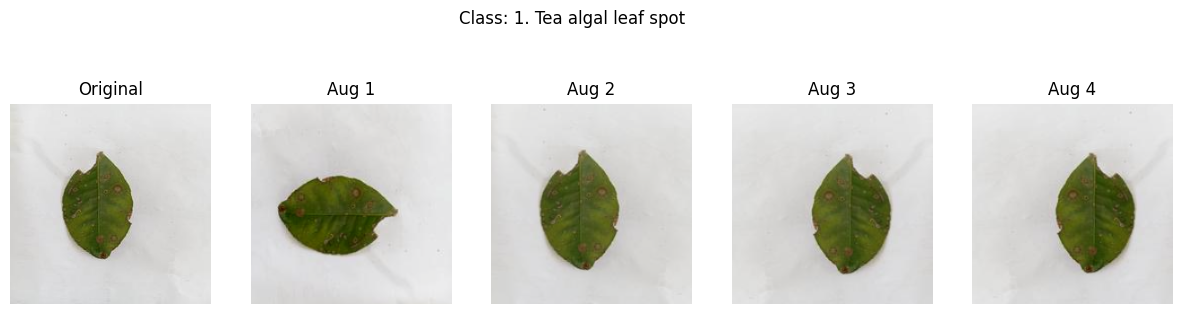

In [ ]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Pick a random class and image from training set
sample_class = random.choice(os.listdir(train_dir))
sample_folder = os.path.join(train_dir, sample_class)
sample_image = random.choice(os.listdir(sample_folder))
img_path = os.path.join(sample_folder, sample_image)

# Load original image
original_img = load_img(img_path, target_size=(224, 224))
original_array = img_to_array(original_img)

# Generate several augmentations for visualization
augmented_images = [augment_image(original_array) for _ in range(4)]

# Display original and augmented images
plt.figure(figsize=(15, 4))
plt.subplot(1, 5, 1)
plt.imshow(original_img)
plt.title("Original")
plt.axis('off')

for i, aug_img in enumerate(augmented_images):
    plt.subplot(1, 5, i + 2)
    plt.imshow(tf.cast(aug_img / 255.0, tf.float32))  # normalize for display
    plt.title(f"Aug {i+1}")
    plt.axis('off')

plt.suptitle(f"Class: {sample_class}")
plt.show()

In [ ]:
from collections import defaultdict

def count_images_per_class(base_dir):
    counts = defaultdict(int)
    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            counts[class_name] = len(os.listdir(class_path))
    return counts

aug_counts = count_images_per_class(augmented_dir)

print("📊 Total images per class after augmentation:")
total = 0
for cls, count in aug_counts.items():
    print(f"  {cls}: {count}")
    total += count
print(f"🧮 Total images (all classes): {total}")

📊 Total images per class after augmentation:
  1. Tea algal leaf spot: 584
  2. Brown Blight: 708
  3. Gray Blight: 1418
  4. Helopeltis: 848
  5. Red spider: 720
  6. Green mirid bug: 1794
  7. Healthy leaf: 1308
🧮 Total images (all classes): 7380


## Image Augmentation (Binary)

In [ ]:
import os, shutil
from tqdm import tqdm

splits = ['train']

for split in splits:
    split_dir = os.path.join(augmented_dir, split)
    new_split_dir = os.path.join(augmented_dir, split + '_binary')
    os.makedirs(os.path.join(new_split_dir, 'healthy'), exist_ok=True)
    os.makedirs(os.path.join(new_split_dir, 'disease'), exist_ok=True)

    print(f"\nProcessing {split} set...")
    for cls in os.listdir(split_dir):
        cls_path = os.path.join(split_dir, cls)
        if not os.path.isdir(cls_path):
            continue

        # determine destination folder
        if cls == '7. Healthy leaf':
            dest_folder = os.path.join(new_split_dir, 'healthy')
        else:
            dest_folder = os.path.join(new_split_dir, 'disease')

        # copy all images
        for img in tqdm(os.listdir(cls_path), desc=f"{cls} → {os.path.basename(dest_folder)}"):
            src = os.path.join(cls_path, img)
            dst = os.path.join(dest_folder, img)
            shutil.copy(src, dst)

print("\n✅ Binary dataset created successfully: 'healthy' vs 'disease'")


Processing train set...


7. Healthy leaf → healthy: 100%|██████████| 1308/1308 [00:35<00:00, 37.02it/s]


✅ Binary dataset created successfully: 'healthy' vs 'disease'


In [ ]:
from collections import defaultdict

def count_images_per_class(base_dir):
    counts = defaultdict(int)
    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            counts[class_name] = len(os.listdir(class_path))
    return counts

bi_counts = count_images_per_class(os.path.join(augmented_dir, "train_binary"))

print("📊 Total images per class:")
total = 0
for cls, count in bi_counts.items():
    print(f"  {cls}: {count}")
    total += count
print(f"🧮 Total images (all classes): {total}")

📊 Total images per class:
  healthy: 1308
  disease: 6072
🧮 Total images (all classes): 7380


# Data Modelling

## Prebuilt CNN-Models (Without Augmented - Multiclass)

In [ ]:
model_dir = '/content/drive/MyDrive/TeaLeafModels'
os.makedirs(model_dir, exist_ok=True)
print("✅ Directory created:", model_dir)

✅ Directory created: /content/drive/MyDrive/TeaLeafModels


In [ ]:
test_dir = os.path.join(resized_dir, 'test')
val_dir  = os.path.join(resized_dir, 'val')
train_dir = os.path.join(resized_dir, 'train')

# For consistent target size
img_size = (224, 224)
batch_size = 32

In [ ]:
def build_and_evaluate(model_name, base_model_fn, preprocess_fn, train_dir, val_dir, test_dir):
    print(f"\n🚀 Training {model_name} ...")

    # Data generators with normalization
    train_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)
    val_gen   = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)
    test_gen  = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)

    train_data = train_gen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
    val_data   = val_gen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
    test_data  = test_gen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

    # Base model
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    # Add classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.4)(x)
    output = Dense(train_data.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train briefly (adjust epochs later)
    model.fit(train_data, validation_data=val_data, epochs=5, verbose=1)

    # Predict on test set
    preds = model.predict(test_data)
    y_pred = preds.argmax(axis=1)
    y_true = test_data.classes

    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    return model_name, acc, prec, rec, f1

In [ ]:
def build_and_evaluate(model_name, base_model_fn, preprocess_fn, train_dir, val_dir, test_dir, save_dir="saved_models"):
    print(f"\n🚀 Training {model_name} ...")

    os.makedirs(save_dir, exist_ok=True)
    model_path = os.path.join(save_dir, f"{model_name}.h5")

    # Data generators
    train_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)
    val_gen   = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)
    test_gen  = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)

    train_data = train_gen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
    val_data   = val_gen.flow_from_directory(val_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
    test_data  = test_gen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False)

    # Base model
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base_model.trainable = False

    # Classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.4)(x)
    output = Dense(train_data.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(train_data, validation_data=val_data, epochs=5, verbose=1)

    # Save model
    model.save(model_path)
    print(f"✅ Model saved at: {model_path}")

    # Predict & compute metrics
    preds = model.predict(test_data)
    y_pred = preds.argmax(axis=1)
    y_true = test_data.classes

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_data.class_indices.keys()))
    plt.figure(figsize=(8,6))
    disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return model, model_name, acc, prec, rec, f1

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


🚀 Training VGG16 ...
Found 3690 images belonging to 7 classes.
Found 1055 images belonging to 7 classes.
Found 531 images belonging to 7 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 1847s 16s/step - accuracy: 0.1134 - loss: 5.9187 - val_accuracy: 0.1412 - val_loss: 3.3007
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 33s 283ms/step - accuracy: 0.1581 - loss: 4.3690 - val_accuracy: 0.2313 - val_loss: 2.8064
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 31s 269ms/step - accuracy: 0.1952 - loss: 3.7553 - val_accuracy: 0.2815 - val_loss: 2.4551
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 32s 277ms/step - accuracy: 0.2167 - loss: 3.5252 - val_accuracy: 0.3412 - val_loss: 2.1886
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - accuracy: 0.2718 - loss: 2.9893 - val_accuracy: 0.3877 - val_loss: 1.9702


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Multiclass_without_augmented_models/VGG16.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 203s 13s/step


<Figure size 800x600 with 0 Axes>

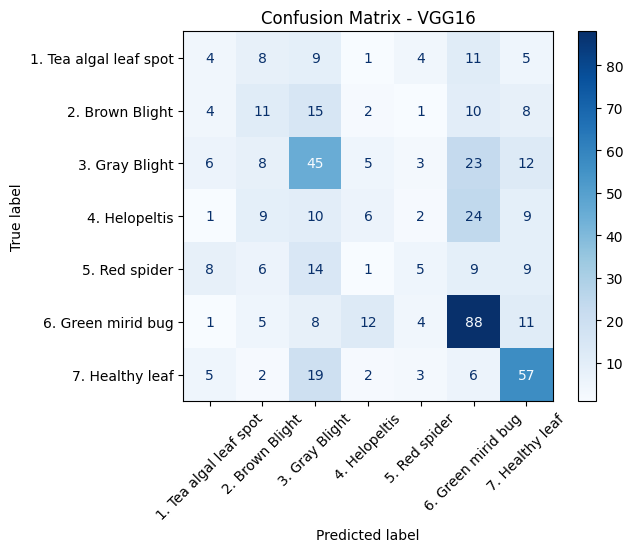


🚀 Training ResNet50 ...
Found 3690 images belonging to 7 classes.
Found 1055 images belonging to 7 classes.
Found 531 images belonging to 7 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 60s 394ms/step - accuracy: 0.1738 - loss: 2.5302 - val_accuracy: 0.4379 - val_loss: 1.5621
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 34s 290ms/step - accuracy: 0.3608 - loss: 1.7654 - val_accuracy: 0.5725 - val_loss: 1.2629
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 27s 232ms/step - accuracy: 0.4873 - loss: 1.4343 - val_accuracy: 0.6303 - val_loss: 1.1067
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 27s 235ms/step - accuracy: 0.5347 - loss: 1.2724 - val_accuracy: 0.6607 - val_loss: 1.0088
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 28s 243ms/step - accuracy: 0.5778 - loss: 1.1732 - val_accuracy: 0.6863 - val_loss: 0.9489


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Multiclass_without_augmented_models/ResNet50.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 608ms/step


<Figure size 800x600 with 0 Axes>

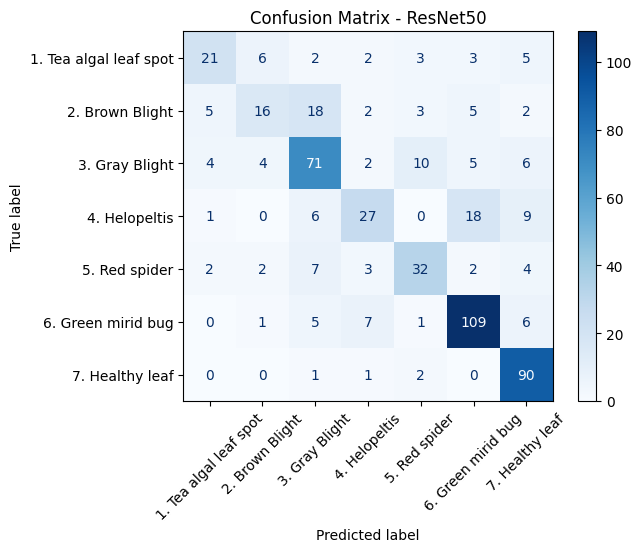


🚀 Training EfficientNetB1 ...
Found 3690 images belonging to 7 classes.
Found 1055 images belonging to 7 classes.
Found 531 images belonging to 7 classes.
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 128s 713ms/step - accuracy: 0.2079 - loss: 1.9816 - val_accuracy: 0.3801 - val_loss: 1.6769
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 24s 207ms/step - accuracy: 0.3401 - loss: 1.7255 - val_accuracy: 0.4645 - val_loss: 1.5075
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 25s 212ms/step - accuracy: 0.4221 - loss: 1.5546 - val_accuracy: 0.5100 - val_loss: 1.3872
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 23s 199ms/step - accuracy: 0.4761 - loss: 1.4434 - val_accuracy: 0.5403 - val_loss: 1.3022
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 37s 167ms/step - accuracy: 0.5221 - loss: 1.3661 - val_accuracy: 0.5545 - val_loss: 1.2359


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Multiclass_without_augmented_models/EfficientNetB1.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step


<Figure size 800x600 with 0 Axes>

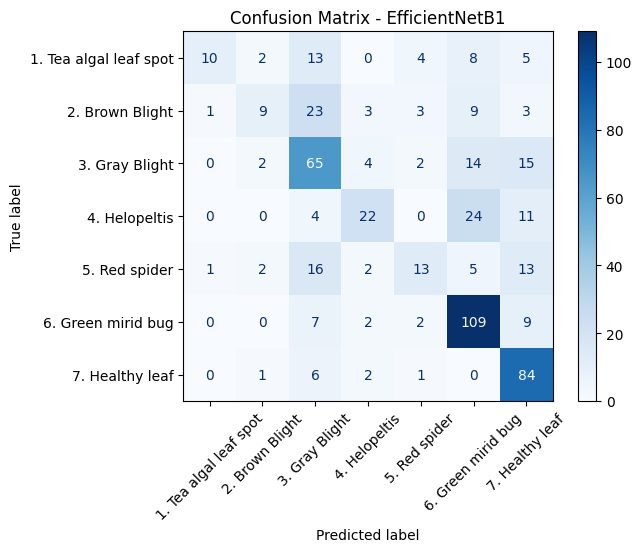


🚀 Training MobileNetV2 ...
Found 3690 images belonging to 7 classes.
Found 1055 images belonging to 7 classes.
Found 531 images belonging to 7 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 56s 364ms/step - accuracy: 0.2091 - loss: 2.2185 - val_accuracy: 0.4218 - val_loss: 1.5751
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - accuracy: 0.3476 - loss: 1.7433 - val_accuracy: 0.5194 - val_loss: 1.3523
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.4270 - loss: 1.5589 - val_accuracy: 0.5829 - val_loss: 1.2210
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.4946 - loss: 1.3835 - val_accuracy: 0.6190 - val_loss: 1.1321
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.5180 - loss: 1.3137 - val_accuracy: 0.6303 - val_loss: 1.0644


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Multiclass_without_augmented_models/MobileNetV2.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 704ms/step


<Figure size 800x600 with 0 Axes>

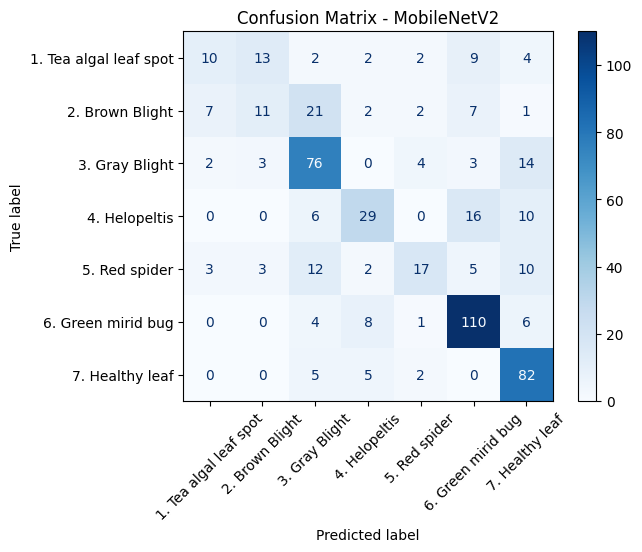

In [ ]:
# Preprocessing functions
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
resnet_preprocess = tf.keras.applications.resnet50.preprocess_input
eff_preprocess = tf.keras.applications.efficientnet.preprocess_input
mob_preprocess = tf.keras.applications.mobilenet_v2.preprocess_input

# Save directory
save_dir = '/content/drive/MyDrive/TeaLeafModels/Multiclass_without_augmented_models'

results = []

# Train and evaluate
results.append(build_and_evaluate("VGG16", tf.keras.applications.VGG16, vgg_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("ResNet50", tf.keras.applications.ResNet50, resnet_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("EfficientNetB1", tf.keras.applications.EfficientNetB1, eff_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("MobileNetV2", tf.keras.applications.MobileNetV2, mob_preprocess, train_dir, val_dir, test_dir, save_dir))

In [ ]:
import pandas as pd

# Create a dataframe
df_results = pd.DataFrame([{
    "Model": r[1],
    "Accuracy": r[2],
    "Precision": r[3],
    "Recall": r[4],
    "F1-score": r[5]
} for r in results])

df_results = df_results.sort_values(by="Accuracy", ascending=False)
df_results

Model  Accuracy  Precision    Recall  F1-score
1        ResNet50  0.689266   0.654277  0.624317  0.629031
3     MobileNetV2  0.630885   0.573528  0.532324  0.534071
2  EfficientNetB1  0.587571   0.610636  0.485865  0.490766
0           VGG16  0.406780   0.314246  0.319310  0.307045

## Prbuilt CNN-Models (Augmented - Multiclass)

In [ ]:
test_dir = os.path.join(resized_dir, 'test')
val_dir  = os.path.join(resized_dir, 'val')
train_dir = os.path.join(augmented_dir, 'train')

# For consistent target size
img_size = (224, 224)
batch_size = 32

In [ ]:
def build_and_evaluate(model_name, base_model_fn, preprocess_fn, train_dir, val_dir, test_dir, save_dir="saved_models"):
    print(f"\n🚀 Training {model_name} ...")

    os.makedirs(save_dir, exist_ok=True)
    model_path = os.path.join(save_dir, f"{model_name}.h5")

    # Data generators
    train_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)
    val_gen   = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)
    test_gen  = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)

    train_data = train_gen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
    val_data   = val_gen.flow_from_directory(val_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
    test_data  = test_gen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False)

    # Base model
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base_model.trainable = False

    # Classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.4)(x)
    output = Dense(train_data.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(train_data, validation_data=val_data, epochs=5, verbose=1)

    # Save model
    model.save(model_path)
    print(f"✅ Model saved at: {model_path}")

    # Predict & compute metrics
    preds = model.predict(test_data)
    y_pred = preds.argmax(axis=1)
    y_true = test_data.classes

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_data.class_indices.keys()))
    plt.figure(figsize=(8,6))
    disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return model, model_name, acc, prec, rec, f1

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


🚀 Training VGG16 ...
Found 7380 images belonging to 7 classes.
Found 1055 images belonging to 7 classes.
Found 531 images belonging to 7 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 1707s 7s/step - accuracy: 0.1896 - loss: 5.0974 - val_accuracy: 0.2682 - val_loss: 2.5102
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 59s 256ms/step - accuracy: 0.2682 - loss: 3.5363 - val_accuracy: 0.3649 - val_loss: 2.0072
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 55s 239ms/step - accuracy: 0.3202 - loss: 2.9771 - val_accuracy: 0.4341 - val_loss: 1.7190
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 56s 241ms/step - accuracy: 0.3883 - loss: 2.5129 - val_accuracy: 0.4815 - val_loss: 1.5381
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 54s 234ms/step - accuracy: 0.4327 - loss: 2.2339 - val_accuracy: 0.5280 - val_loss: 1.4093


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Multiclass_augmented_models/VGG16.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 125s 8s/step


<Figure size 800x600 with 0 Axes>

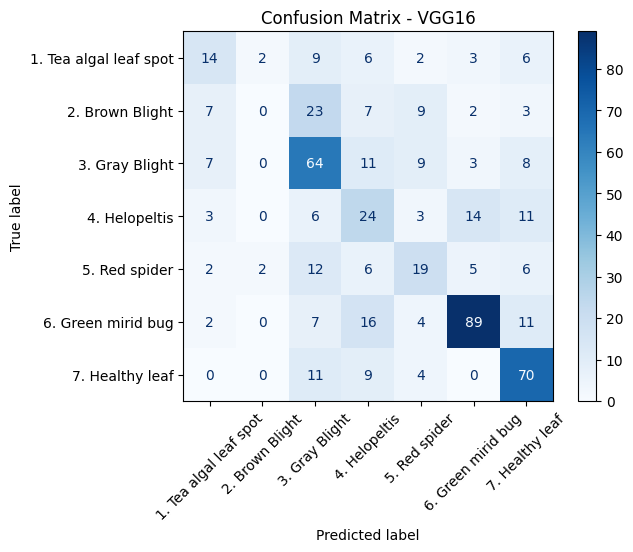


🚀 Training ResNet50 ...
Found 7380 images belonging to 7 classes.
Found 1055 images belonging to 7 classes.
Found 531 images belonging to 7 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 80s 276ms/step - accuracy: 0.2300 - loss: 2.1308 - val_accuracy: 0.5204 - val_loss: 1.3453
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 47s 202ms/step - accuracy: 0.4905 - loss: 1.4203 - val_accuracy: 0.6028 - val_loss: 1.1154
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 51s 222ms/step - accuracy: 0.5909 - loss: 1.1482 - val_accuracy: 0.6540 - val_loss: 1.0087
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 50s 214ms/step - accuracy: 0.6431 - loss: 1.0067 - val_accuracy: 0.6607 - val_loss: 0.9551
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 49s 213ms/step - accuracy: 0.6703 - loss: 0.9230 - val_accuracy: 0.6844 - val_loss: 0.9052


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Multiclass_augmented_models/ResNet50.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 516ms/step


<Figure size 800x600 with 0 Axes>

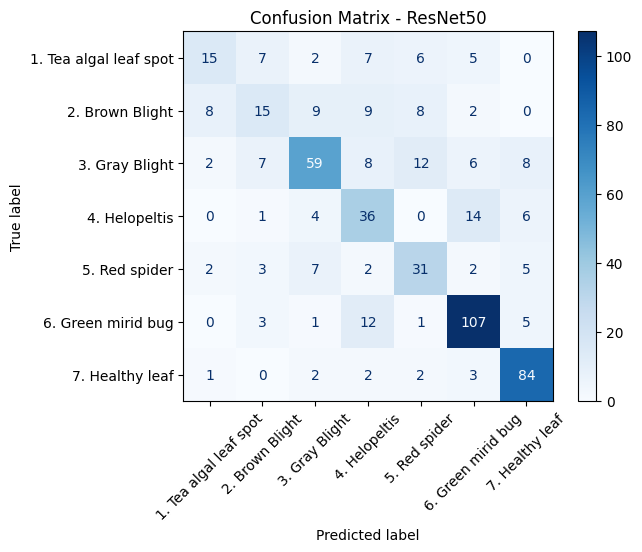


🚀 Training EfficientNetB1 ...
Found 7380 images belonging to 7 classes.
Found 1055 images belonging to 7 classes.
Found 531 images belonging to 7 classes.
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 140s 416ms/step - accuracy: 0.3030 - loss: 1.8279 - val_accuracy: 0.4796 - val_loss: 1.4858
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 46s 200ms/step - accuracy: 0.4819 - loss: 1.4576 - val_accuracy: 0.5640 - val_loss: 1.3028
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 44s 190ms/step - accuracy: 0.5607 - loss: 1.2526 - val_accuracy: 0.5915 - val_loss: 1.1965
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 45s 195ms/step - accuracy: 0.5967 - loss: 1.1519 - val_accuracy: 0.6227 - val_loss: 1.1259
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 46s 198ms/step - accuracy: 0.6212 - loss: 1.0949 - val_accuracy: 0.6445 - val_loss: 1.0765


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Multiclass_augmented_models/EfficientNetB1.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step


<Figure size 800x600 with 0 Axes>

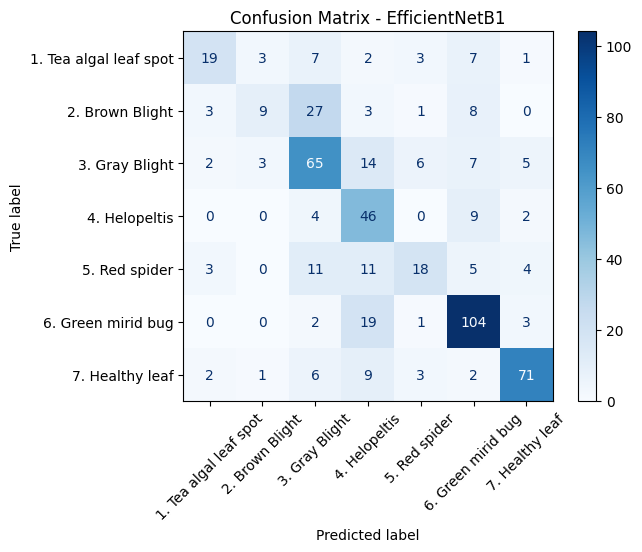


🚀 Training MobileNetV2 ...
Found 7380 images belonging to 7 classes.
Found 1055 images belonging to 7 classes.
Found 531 images belonging to 7 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 86s 302ms/step - accuracy: 0.2223 - loss: 2.1889 - val_accuracy: 0.4616 - val_loss: 1.4984
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 34s 149ms/step - accuracy: 0.4136 - loss: 1.6052 - val_accuracy: 0.5403 - val_loss: 1.2686
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 34s 147ms/step - accuracy: 0.5146 - loss: 1.3524 - val_accuracy: 0.5820 - val_loss: 1.1479
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 35s 149ms/step - accuracy: 0.5599 - loss: 1.2006 - val_accuracy: 0.6057 - val_loss: 1.0728
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 34s 147ms/step - accuracy: 0.6038 - loss: 1.0889 - val_accuracy: 0.6389 - val_loss: 1.0111


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Multiclass_augmented_models/MobileNetV2.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 724ms/step


<Figure size 800x600 with 0 Axes>

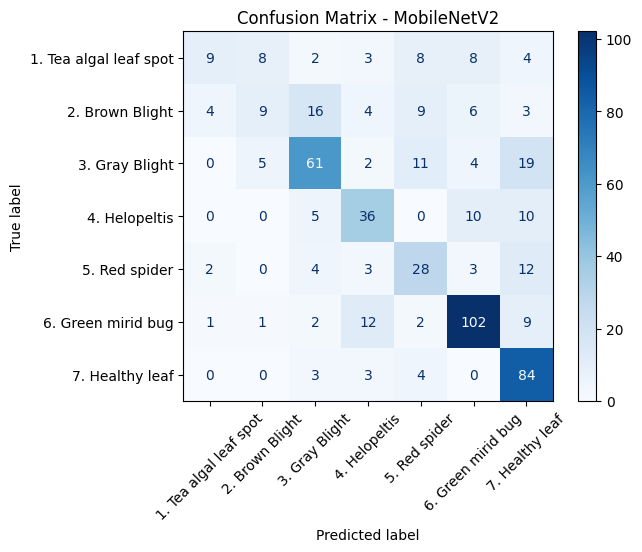

In [ ]:
# Preprocessing functions
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
resnet_preprocess = tf.keras.applications.resnet50.preprocess_input
eff_preprocess = tf.keras.applications.efficientnet.preprocess_input
mob_preprocess = tf.keras.applications.mobilenet_v2.preprocess_input

# Save directory
save_dir = '/content/drive/MyDrive/TeaLeafModels/Multiclass_augmented_models'

results = []

# Train and evaluate
results.append(build_and_evaluate("VGG16", tf.keras.applications.VGG16, vgg_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("ResNet50", tf.keras.applications.ResNet50, resnet_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("EfficientNetB1", tf.keras.applications.EfficientNetB1, eff_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("MobileNetV2", tf.keras.applications.MobileNetV2, mob_preprocess, train_dir, val_dir, test_dir, save_dir))

In [ ]:
import pandas as pd

# Create a dataframe
df_results = pd.DataFrame([{
    "Model": r[1],
    "Accuracy": r[2],
    "Precision": r[3],
    "Recall": r[4],
    "F1-score": r[5]
} for r in results])

df_results = df_results.sort_values(by="Accuracy", ascending=False)
df_results

Model  Accuracy  Precision    Recall  F1-score
1        ResNet50  0.653484   0.598954  0.591298  0.588160
2  EfficientNetB1  0.625235   0.616178  0.561126  0.560970
3     MobileNetV2  0.619586   0.570775  0.543105  0.534946
0           VGG16  0.527307   0.420655  0.450602  0.431777

## Prebuilt CNN-Models (Without Augmented - Binary Class)

In [ ]:
test_dir = os.path.join(resized_dir, 'test_binary')
val_dir  = os.path.join(resized_dir, 'val_binary')
train_dir = os.path.join(resized_dir, 'train_binary')

# For consistent target size
img_size = (224, 224)
batch_size = 32

In [ ]:
def build_and_evaluate(model_name, base_model_fn, preprocess_fn, train_dir, val_dir, test_dir, save_dir="saved_models"):
    print(f"\n🚀 Training {model_name} ...")

    os.makedirs(save_dir, exist_ok=True)
    model_path = os.path.join(save_dir, f"{model_name}.h5")

    # Data generators
    train_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)
    val_gen   = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)
    test_gen  = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)

    train_data = train_gen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
    val_data   = val_gen.flow_from_directory(val_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
    test_data  = test_gen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False)

    # Base model
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base_model.trainable = False

    # Classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.4)(x)
    output = Dense(train_data.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(train_data, validation_data=val_data, epochs=5, verbose=1)

    # Save model
    model.save(model_path)
    print(f"✅ Model saved at: {model_path}")

    # Predict & compute metrics
    preds = model.predict(test_data)
    y_pred = preds.argmax(axis=1)
    y_true = test_data.classes

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_data.class_indices.keys()))
    plt.figure(figsize=(8,6))
    disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return model, model_name, acc, prec, rec, f1

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


🚀 Training VGG16 ...
Found 3690 images belonging to 2 classes.
Found 1055 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.6578 - loss: 1.5425 - val_accuracy: 0.7877 - val_loss: 0.8989
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 26s 222ms/step - accuracy: 0.7384 - loss: 1.1741 - val_accuracy: 0.8104 - val_loss: 0.7636
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 27s 229ms/step - accuracy: 0.7623 - loss: 0.9283 - val_accuracy: 0.8171 - val_loss: 0.6070
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 26s 222ms/step - accuracy: 0.7679 - loss: 0.8993 - val_accuracy: 0.8351 - val_loss: 0.5364
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 26s 220ms/step - accuracy: 0.8071 - loss: 0.6988 - val_accuracy: 0.8445 - val_loss: 0.4053


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Binary_without_augmented_models/VGG16.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 106s 7s/step


<Figure size 800x600 with 0 Axes>

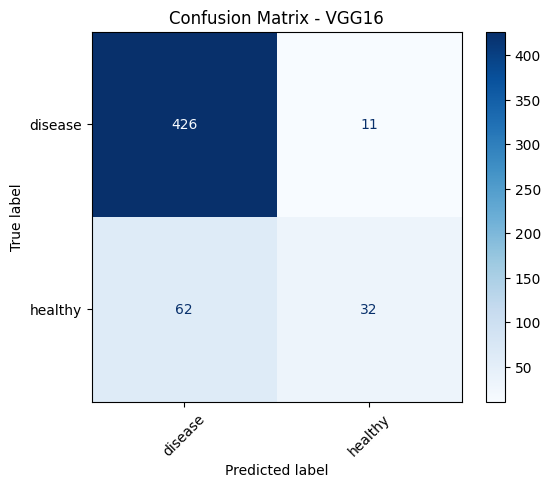


🚀 Training ResNet50 ...
Found 3690 images belonging to 2 classes.
Found 1055 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 42s 286ms/step - accuracy: 0.5676 - loss: 0.9914 - val_accuracy: 0.8294 - val_loss: 0.3629
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - accuracy: 0.8263 - loss: 0.4111 - val_accuracy: 0.8730 - val_loss: 0.2728
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - accuracy: 0.8523 - loss: 0.3272 - val_accuracy: 0.9118 - val_loss: 0.2188
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.8789 - loss: 0.2798 - val_accuracy: 0.9251 - val_loss: 0.1894
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 23s 195ms/step - accuracy: 0.9131 - loss: 0.2154 - val_accuracy: 0.9403 - val_loss: 0.1686


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Binary_without_augmented_models/ResNet50.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 458ms/step


<Figure size 800x600 with 0 Axes>

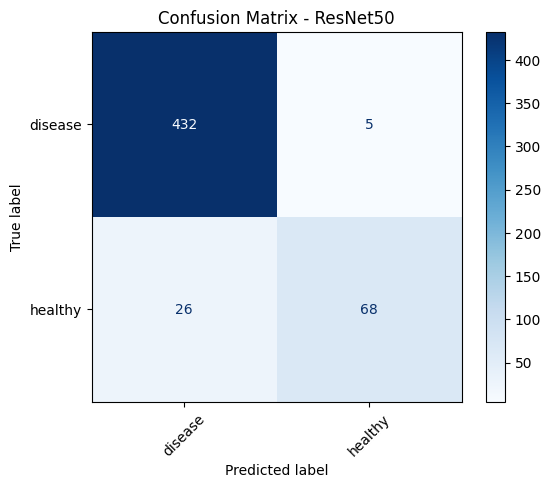


🚀 Training EfficientNetB1 ...
Found 3690 images belonging to 2 classes.
Found 1055 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 89s 500ms/step - accuracy: 0.5931 - loss: 0.6931 - val_accuracy: 0.8227 - val_loss: 0.3910
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.8233 - loss: 0.4003 - val_accuracy: 0.8360 - val_loss: 0.3264
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - accuracy: 0.8538 - loss: 0.3302 - val_accuracy: 0.8730 - val_loss: 0.2854
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.8595 - loss: 0.3046 - val_accuracy: 0.8986 - val_loss: 0.2578
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.8801 - loss: 0.2739 - val_accuracy: 0.9137 - val_loss: 0.2382


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Binary_without_augmented_models/EfficientNetB1.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 735ms/step


<Figure size 800x600 with 0 Axes>

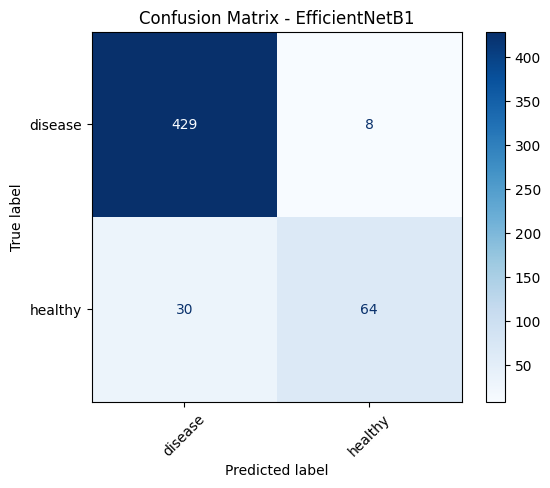


🚀 Training MobileNetV2 ...
Found 3690 images belonging to 2 classes.
Found 1055 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 45s 314ms/step - accuracy: 0.4260 - loss: 1.4171 - val_accuracy: 0.8218 - val_loss: 0.4544
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - accuracy: 0.7960 - loss: 0.5110 - val_accuracy: 0.8303 - val_loss: 0.3578
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.8234 - loss: 0.4224 - val_accuracy: 0.8550 - val_loss: 0.2956
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - accuracy: 0.8465 - loss: 0.3503 - val_accuracy: 0.8929 - val_loss: 0.2526
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.8660 - loss: 0.3181 - val_accuracy: 0.9062 - val_loss: 0.2297


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Binary_without_augmented_models/MobileNetV2.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 439ms/step


<Figure size 800x600 with 0 Axes>

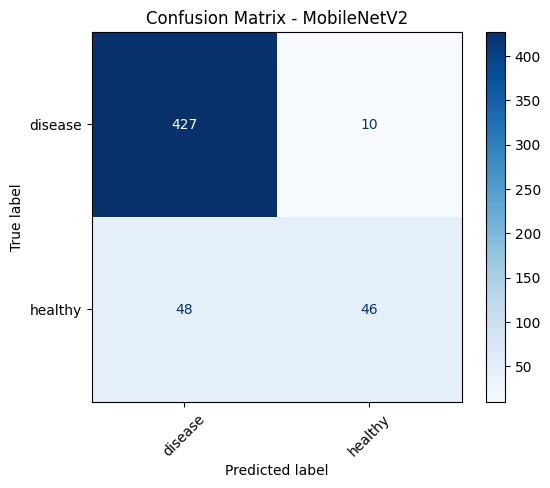

In [ ]:
# Preprocessing functions
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
resnet_preprocess = tf.keras.applications.resnet50.preprocess_input
eff_preprocess = tf.keras.applications.efficientnet.preprocess_input
mob_preprocess = tf.keras.applications.mobilenet_v2.preprocess_input

# Save directory
save_dir = '/content/drive/MyDrive/TeaLeafModels/Binary_without_augmented_models'

results = []

# Train and evaluate
results.append(build_and_evaluate("VGG16", tf.keras.applications.VGG16, vgg_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("ResNet50", tf.keras.applications.ResNet50, resnet_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("EfficientNetB1", tf.keras.applications.EfficientNetB1, eff_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("MobileNetV2", tf.keras.applications.MobileNetV2, mob_preprocess, train_dir, val_dir, test_dir, save_dir))

In [ ]:
import pandas as pd

# Create a dataframe
df_results = pd.DataFrame([{
    "Model": r[1],
    "Accuracy": r[2],
    "Precision": r[3],
    "Recall": r[4],
    "F1-score": r[5]
} for r in results])

df_results = df_results.sort_values(by="Accuracy", ascending=False)
df_results

Model  Accuracy  Precision    Recall  F1-score
1        ResNet50  0.941620   0.937369  0.855981  0.889867
2  EfficientNetB1  0.928437   0.911765  0.831272  0.864337
3     MobileNetV2  0.890772   0.860188  0.733239  0.774868
0           VGG16  0.862524   0.808568  0.657627  0.694117

## Prebuilt CNN-Models (With Augmentation - Binary Class)

In [ ]:
test_dir = os.path.join(resized_dir, 'test_binary')
val_dir  = os.path.join(resized_dir, 'val_binary')
train_dir = os.path.join(augmented_dir, 'train_binary')

# For consistent target size
img_size = (224, 224)
batch_size = 32

In [ ]:
def build_and_evaluate(model_name, base_model_fn, preprocess_fn, train_dir, val_dir, test_dir, save_dir="saved_models"):
    print(f"\n🚀 Training {model_name} ...")

    os.makedirs(save_dir, exist_ok=True)
    model_path = os.path.join(save_dir, f"{model_name}.h5")

    # Data generators
    train_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)
    val_gen   = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)
    test_gen  = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_fn)

    train_data = train_gen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
    val_data   = val_gen.flow_from_directory(val_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
    test_data  = test_gen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False)

    # Base model
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base_model.trainable = False

    # Classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.4)(x)
    output = Dense(train_data.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(train_data, validation_data=val_data, epochs=5, verbose=1)

    # Save model
    model.save(model_path)
    print(f"✅ Model saved at: {model_path}")

    # Predict & compute metrics
    preds = model.predict(test_data)
    y_pred = preds.argmax(axis=1)
    y_true = test_data.classes

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_data.class_indices.keys()))
    plt.figure(figsize=(8,6))
    disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return model, model_name, acc, prec, rec, f1

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


🚀 Training VGG16 ...
Found 7380 images belonging to 2 classes.
Found 1055 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 2656s 11s/step - accuracy: 0.7171 - loss: 1.3571 - val_accuracy: 0.8133 - val_loss: 0.6073
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 55s 237ms/step - accuracy: 0.7710 - loss: 0.8861 - val_accuracy: 0.8313 - val_loss: 0.3839
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 82s 237ms/step - accuracy: 0.8147 - loss: 0.5588 - val_accuracy: 0.8645 - val_loss: 0.2983
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 53s 230ms/step - accuracy: 0.8372 - loss: 0.4775 - val_accuracy: 0.8777 - val_loss: 0.2642
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 54s 235ms/step - accuracy: 0.8788 - loss: 0.3245 - val_accuracy: 0.8910 - val_loss: 0.2396


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Binary_augmented_models/VGG16.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 163s 10s/step


<Figure size 800x600 with 0 Axes>

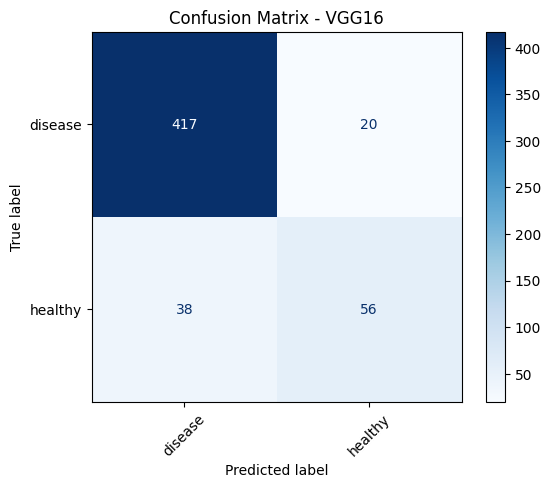


🚀 Training ResNet50 ...
Found 7380 images belonging to 2 classes.
Found 1055 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 124s 286ms/step - accuracy: 0.6712 - loss: 0.6793 - val_accuracy: 0.8844 - val_loss: 0.2757
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 50s 215ms/step - accuracy: 0.8851 - loss: 0.2710 - val_accuracy: 0.9280 - val_loss: 0.2007
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 50s 214ms/step - accuracy: 0.9186 - loss: 0.2059 - val_accuracy: 0.9365 - val_loss: 0.1731
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 51s 221ms/step - accuracy: 0.9362 - loss: 0.1635 - val_accuracy: 0.9441 - val_loss: 0.1523
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 51s 219ms/step - accuracy: 0.9440 - loss: 0.1400 - val_accuracy: 0.9488 - val_loss: 0.1405


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Binary_augmented_models/ResNet50.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 510ms/step


<Figure size 800x600 with 0 Axes>

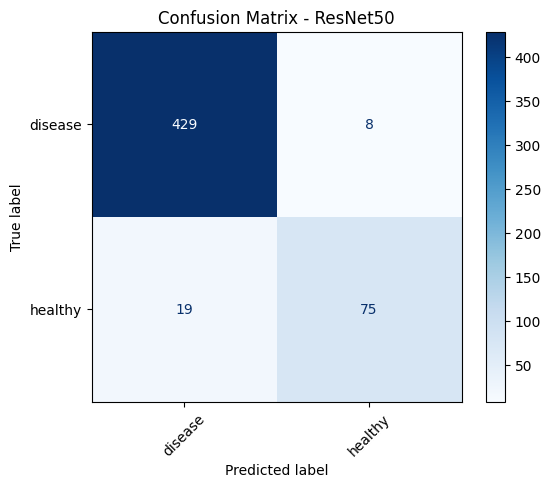


🚀 Training EfficientNetB1 ...
Found 7380 images belonging to 2 classes.
Found 1055 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 130s 398ms/step - accuracy: 0.7682 - loss: 0.4877 - val_accuracy: 0.8303 - val_loss: 0.3187
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 43s 187ms/step - accuracy: 0.8708 - loss: 0.3031 - val_accuracy: 0.8758 - val_loss: 0.2544
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 43s 185ms/step - accuracy: 0.8999 - loss: 0.2480 - val_accuracy: 0.8900 - val_loss: 0.2278
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 46s 198ms/step - accuracy: 0.9250 - loss: 0.2100 - val_accuracy: 0.8986 - val_loss: 0.2095
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 49s 211ms/step - accuracy: 0.9232 - loss: 0.1956 - val_accuracy: 0.9100 - val_loss: 0.1958


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Binary_augmented_models/EfficientNetB1.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 885ms/step


<Figure size 800x600 with 0 Axes>

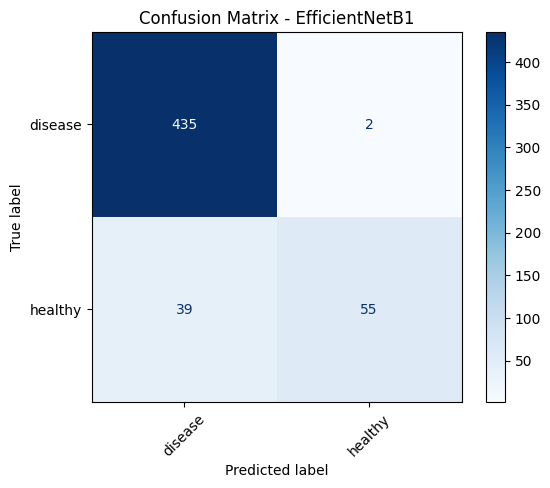


🚀 Training MobileNetV2 ...
Found 7380 images belonging to 2 classes.
Found 1055 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 125s 306ms/step - accuracy: 0.7706 - loss: 0.5512 - val_accuracy: 0.8730 - val_loss: 0.2805
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 44s 191ms/step - accuracy: 0.8651 - loss: 0.3086 - val_accuracy: 0.9100 - val_loss: 0.2196
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 47s 204ms/step - accuracy: 0.8849 - loss: 0.2614 - val_accuracy: 0.9242 - val_loss: 0.1908
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 44s 192ms/step - accuracy: 0.9186 - loss: 0.2089 - val_accuracy: 0.9242 - val_loss: 0.1730
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 81s 190ms/step - accuracy: 0.9126 - loss: 0.2009 - val_accuracy: 0.9299 - val_loss: 0.1619


✅ Model saved at: /content/drive/MyDrive/TeaLeafModels/Binary_augmented_models/MobileNetV2.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 473ms/step


<Figure size 800x600 with 0 Axes>

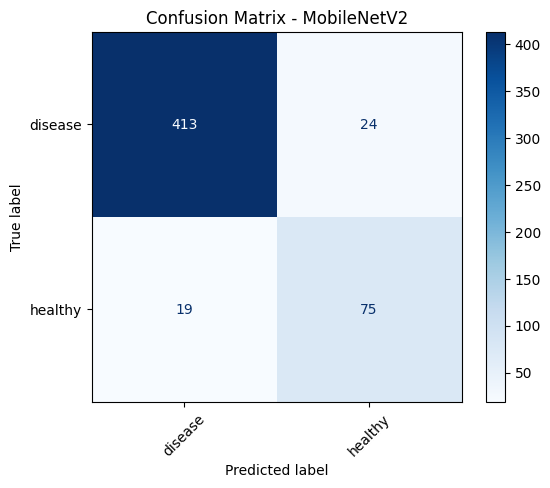

In [ ]:
# Preprocessing functions
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
resnet_preprocess = tf.keras.applications.resnet50.preprocess_input
eff_preprocess = tf.keras.applications.efficientnet.preprocess_input
mob_preprocess = tf.keras.applications.mobilenet_v2.preprocess_input

# Save directory
save_dir = '/content/drive/MyDrive/TeaLeafModels/Binary_augmented_models'

results = []

# Train and evaluate
results.append(build_and_evaluate("VGG16", tf.keras.applications.VGG16, vgg_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("ResNet50", tf.keras.applications.ResNet50, resnet_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("EfficientNetB1", tf.keras.applications.EfficientNetB1, eff_preprocess, train_dir, val_dir, test_dir, save_dir))
results.append(build_and_evaluate("MobileNetV2", tf.keras.applications.MobileNetV2, mob_preprocess, train_dir, val_dir, test_dir, save_dir))

In [ ]:
import pandas as pd

# Create a dataframe
df_results = pd.DataFrame([{
    "Model": r[1],
    "Accuracy": r[2],
    "Precision": r[3],
    "Recall": r[4],
    "F1-score": r[5]
} for r in results])

df_results = df_results.sort_values(by="Accuracy", ascending=False)
df_results

Model  Accuracy  Precision    Recall  F1-score
1        ResNet50  0.949153   0.930602  0.889783  0.908475
2  EfficientNetB1  0.922787   0.941317  0.790265  0.841736
3     MobileNetV2  0.919021   0.856797  0.871476  0.863860
0           VGG16  0.890772   0.826663  0.774989  0.796901

## Hybrid CNN-Models (Without Augmented (Multiclass))

In [ ]:
!pip install xgboost scikit-learn

In [ ]:
img_size = (224, 224)
batch_size = 32
test_dir = os.path.join(resized_dir, 'test')
train_dir = os.path.join(resized_dir, 'train')

datagen = ImageDataGenerator(preprocessing_function=vgg_preprocess)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_gen.class_indices)

Found 3690 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


In [ ]:
cnn_models = {
    'VGG16': (VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)), vgg_preprocess),
    'ResNet50': (ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)), resnet_preprocess),
    'EfficientNetB1': (EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224,224,3)), eff_preprocess),
    'MobileNetV2': (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3)), mob_preprocess),
}

In [ ]:
def extract_features(model, generator):
    feature_model = Model(inputs=model.input, outputs=GlobalAveragePooling2D()(model.output))
    features = feature_model.predict(generator, verbose=1)
    labels = generator.classes
    return features, labels


=== Extracting features using VGG16 ===
Found 3690 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 28s 231ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step

=== Training ML classifiers on VGG16 features with tuning ===

🔹 Random search for RandomForest on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on VGG16: Acc=0.7062, Prec=0.6999, Rec=0.7062, F1=0.6962


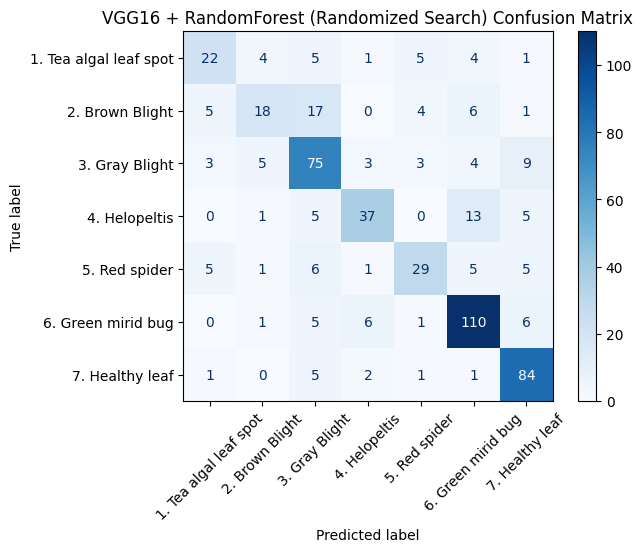

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/VGG16_RandomForest_best_model.pkl

🔹 Random search for SVM on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on VGG16: Acc=0.8173, Prec=0.8194, Rec=0.8173, F1=0.8129


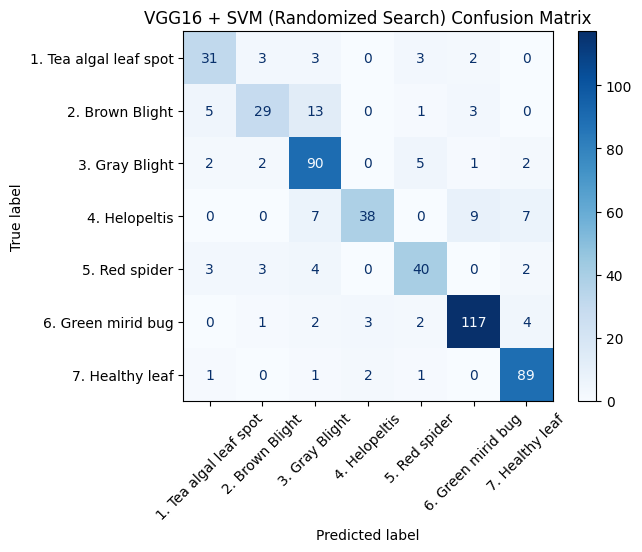

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/VGG16_SVM_best_model.pkl

🔹 Random search for XGBoost on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:17:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on VGG16: Acc=0.7646, Prec=0.7633, Rec=0.7646, F1=0.7615


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [11:17:26] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


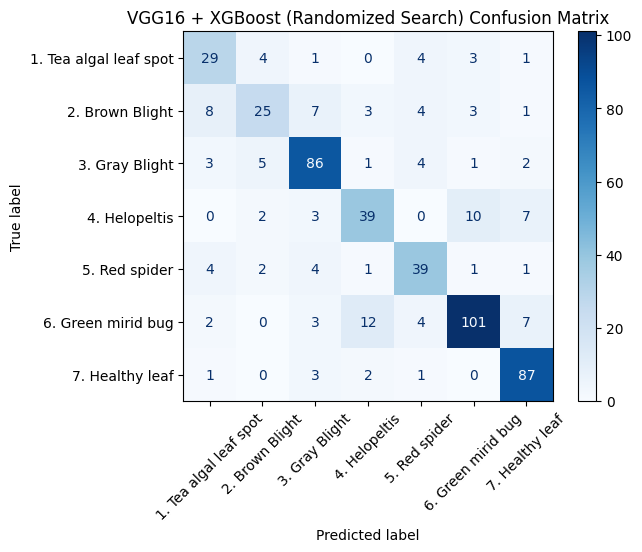

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/VGG16_XGBoost_best_model.pkl

=== Extracting features using ResNet50 ===
Found 3690 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 244ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 635ms/step

=== Training ML classifiers on ResNet50 features with tuning ===

🔹 Random search for RandomForest on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on ResNet50: Acc=0.7363, Prec=0.7258, Rec=0.7363, F1=0.7228


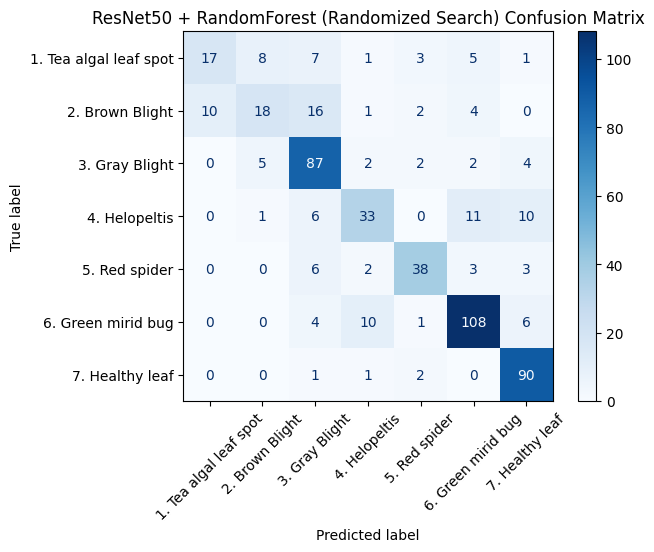

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/ResNet50_RandomForest_best_model.pkl

🔹 Random search for SVM on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'auto', 'C': 10}
SVM on ResNet50: Acc=0.8399, Prec=0.8388, Rec=0.8399, F1=0.8382


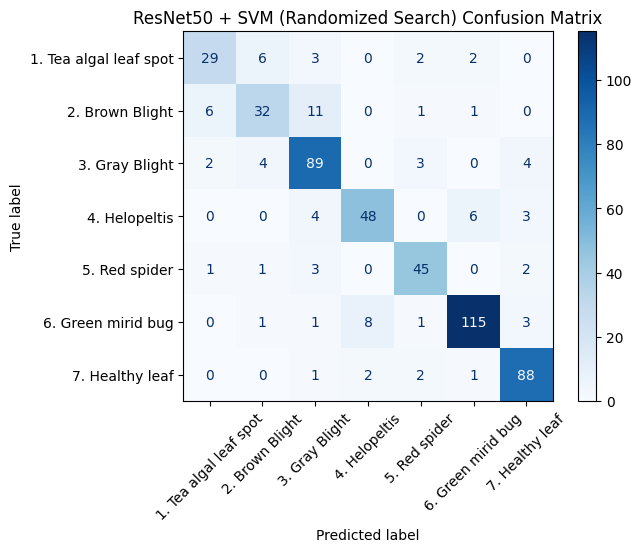

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/ResNet50_SVM_best_model.pkl

🔹 Random search for XGBoost on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:27:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on ResNet50: Acc=0.7910, Prec=0.7901, Rec=0.7910, F1=0.7872


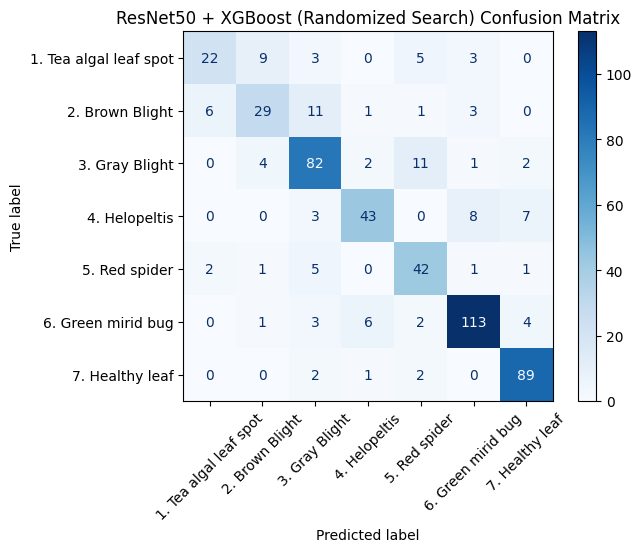

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/ResNet50_XGBoost_best_model.pkl

=== Extracting features using EfficientNetB1 ===
Found 3690 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 58s 326ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step

=== Training ML classifiers on EfficientNetB1 features with tuning ===

🔹 Random search for RandomForest on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on EfficientNetB1: Acc=0.6836, Prec=0.6847, Rec=0.6836, F1=0.6673


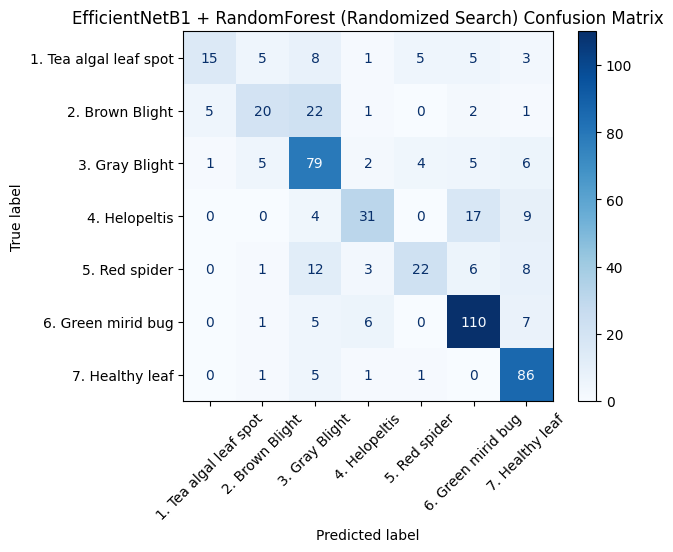

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/EfficientNetB1_RandomForest_best_model.pkl

🔹 Random search for SVM on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'auto', 'C': 10}
SVM on EfficientNetB1: Acc=0.7891, Prec=0.7884, Rec=0.7891, F1=0.7882


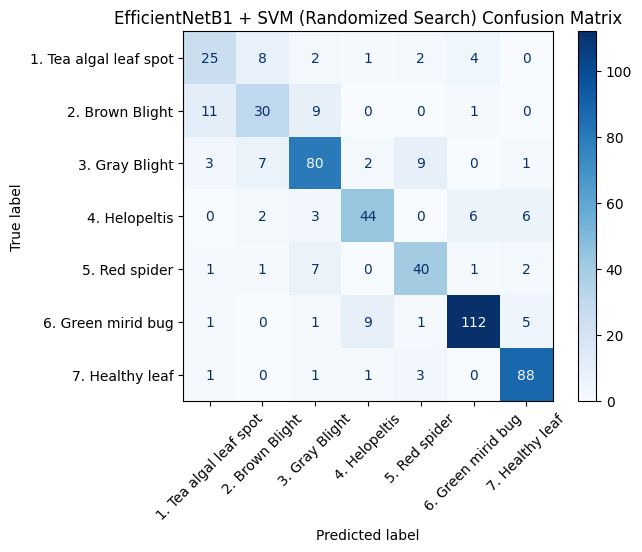

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/EfficientNetB1_SVM_best_model.pkl

🔹 Random search for XGBoost on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:35:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on EfficientNetB1: Acc=0.7589, Prec=0.7540, Rec=0.7589, F1=0.7518


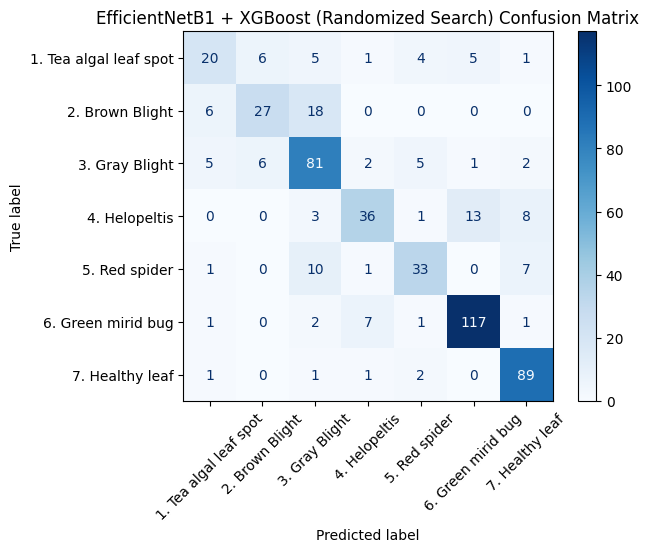

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/EfficientNetB1_XGBoost_best_model.pkl

=== Extracting features using MobileNetV2 ===
Found 3690 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 251ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 768ms/step

=== Training ML classifiers on MobileNetV2 features with tuning ===

🔹 Random search for RandomForest on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on MobileNetV2: Acc=0.7156, Prec=0.7264, Rec=0.7156, F1=0.7032


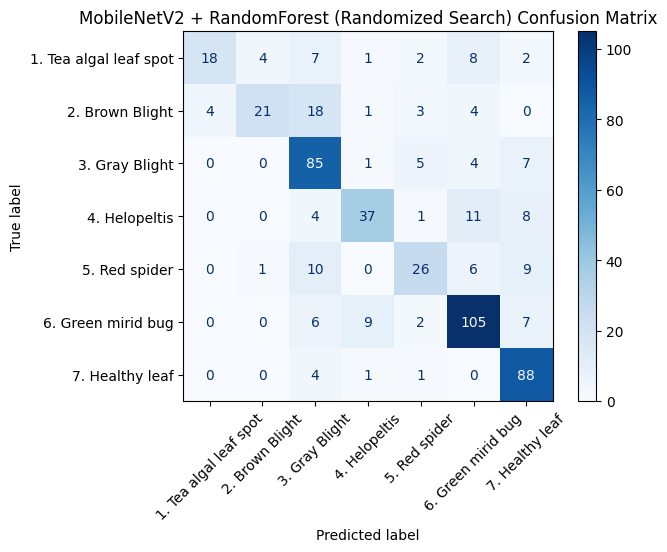

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/MobileNetV2_RandomForest_best_model.pkl

🔹 Random search for SVM on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


KeyboardInterrupt: 

In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Create save folder in Drive ===
save_dir = os.path.join(model_dir, 'Tuned_HyperHyb_MultiWithoutAug')
os.makedirs(save_dir, exist_ok=True)

results = []  # to store evaluation metrics + best params

for name, (cnn, preprocess_func) in cnn_models.items():
    print(f"\n=== Extracting features using {name} ===")

    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    X_train, y_train = extract_features(cnn, train_gen)
    X_test, y_test = extract_features(cnn, test_gen)

    class_names = list(train_gen.class_indices.keys())

    print(f"\n=== Training ML classifiers on {name} features with tuning ===")

    # === Classifiers with imbalance handling ===
    classifiers = {
        'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
        'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
        'XGBoost': XGBClassifier(
            use_label_encoder=False,
            eval_metric='mlogloss',
            tree_method='hist',  # GPU acceleration
            device='gpu',
            random_state=42
        )
    }

    # === Parameter distributions for random search ===
    param_distributions = {
        'RandomForest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'SVM': {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        },
        'XGBoost': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }

    # === Compute sample weights for XGBoost (multi-class) ===
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    for clf_name, clf in classifiers.items():
        print(f"\n🔹 Random search for {clf_name} on {name} features ...")

        random_search = RandomizedSearchCV(
            clf,
            param_distributions=param_distributions[clf_name],
            n_iter=5,       # fewer combinations for speed
            cv=2,           # fewer folds for speed
            scoring='f1_weighted',  # better for imbalanced data
            n_jobs=-1,
            verbose=1,
            random_state=42
        )

        if clf_name == 'XGBoost':
            random_search.fit(X_train, y_train, sample_weight=sample_weights)
        else:
            random_search.fit(X_train, y_train)

        print(f"✅ Best parameters for {clf_name}: {random_search.best_params_}")

        best_clf = random_search.best_estimator_

        # === Evaluate tuned model ===
        y_pred = best_clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'CNN_Model': name,
            'Classifier': clf_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1_Score': f1,
            'Best_Params': random_search.best_params_
        })

        print(f"{clf_name} on {name}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

        # === Confusion Matrix ===
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap='Blues', xticks_rotation=45)
        plt.title(f'{name} + {clf_name} (Randomized Search) Confusion Matrix')
        plt.show()

        # === Save tuned model ===
        model_filename = f"{name}_{clf_name}_best_model.pkl"
        model_path = os.path.join(save_dir, model_filename)
        joblib.dump(best_clf, model_path)
        print(f"✅ Saved tuned model to Google Drive: {model_path}")

# === Save results as CSV ===
results_df = pd.DataFrame(results)
csv_path = os.path.join(model_dir, '(Multiclass+NoAug)Hybrid_Model_Results.csv')
results_df.to_csv(csv_path, index=False)

print(f"\n📊 All results saved to: {csv_path}")
display(results_df)

### Continue (due to interuption)


=== Extracting features using MobileNetV2 ===
Found 3690 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 31s 225ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 764ms/step

=== Training ML classifiers on MobileNetV2 features with tuning ===

🔹 Random search for RandomForest on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on MobileNetV2: Acc=0.7156, Prec=0.7264, Rec=0.7156, F1=0.7032


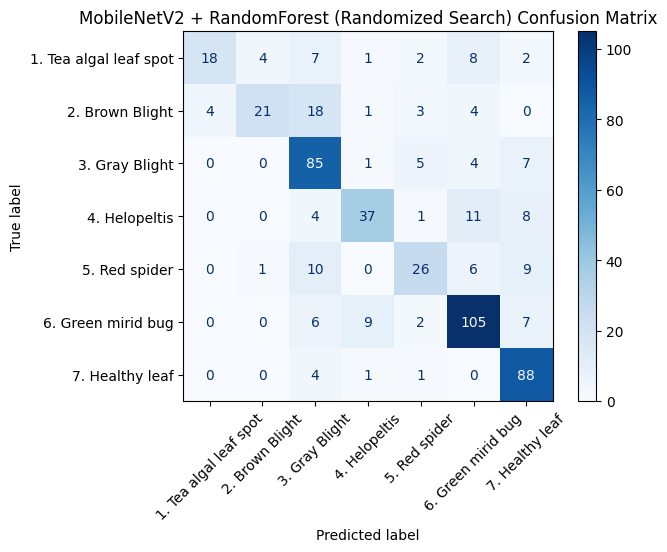

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/MobileNetV2_RandomForest_best_model.pkl

🔹 Random search for SVM on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'auto', 'C': 10}
SVM on MobileNetV2: Acc=0.8023, Prec=0.8036, Rec=0.8023, F1=0.8010


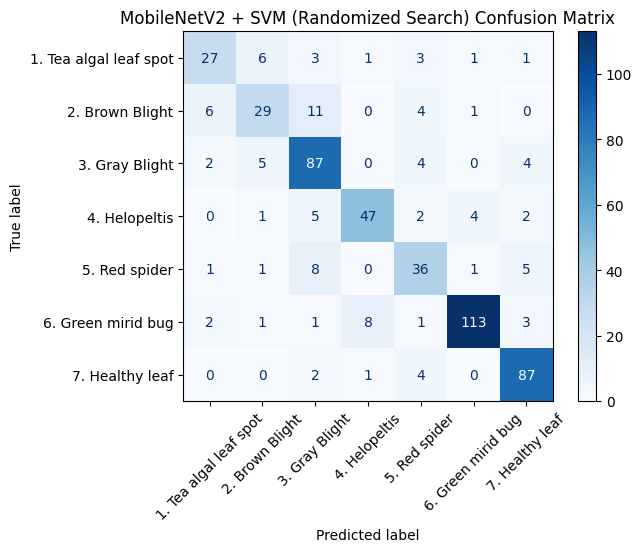

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/MobileNetV2_SVM_best_model.pkl

🔹 Random search for XGBoost on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:53:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on MobileNetV2: Acc=0.7458, Prec=0.7494, Rec=0.7458, F1=0.7441


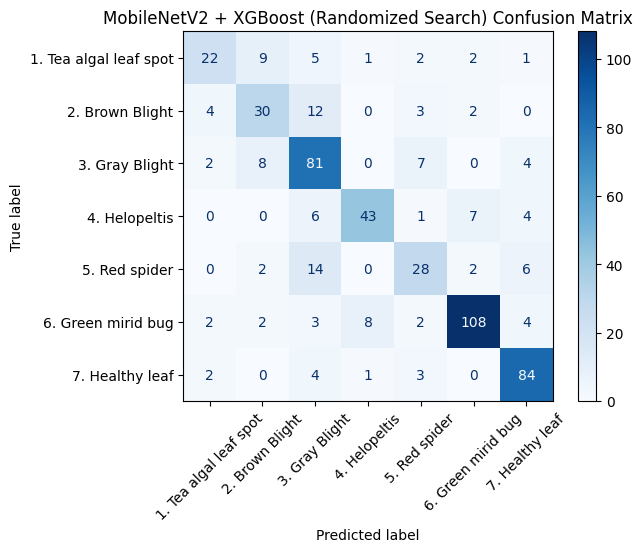

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithoutAug/MobileNetV2_XGBoost_best_model.pkl

📊 All results saved to: /content/drive/MyDrive/TeaLeafModels/(Multiclass+NoAug)Hybrid_Model_Results.csv


CNN_Model    Classifier  Accuracy  Precision    Recall  F1_Score  \
0            VGG16  RandomForest  0.706215   0.699949  0.706215  0.696216   
1            VGG16           SVM  0.817326   0.819419  0.817326  0.812949   
2            VGG16       XGBoost  0.764595   0.763312  0.764595  0.761500   
3         ResNet50  RandomForest  0.736347   0.725791  0.736347  0.722798   
4         ResNet50           SVM  0.839925   0.838820  0.839925  0.838229   
5         ResNet50       XGBoost  0.790960   0.790072  0.790960  0.787227   
6   EfficientNetB1  RandomForest  0.683616   0.684744  0.683616  0.667290   
7   EfficientNetB1           SVM  0.789077   0.788359  0.789077  0.788155   
8   EfficientNetB1       XGBoost  0.758945   0.753971  0.758945  0.751776   
9      MobileNetV2  RandomForest  0.715631   0.726390  0.715631  0.703174   
10     MobileNetV2  RandomForest  0.715631   0.726390  0.715631  0.703174   
11     MobileNetV2           SVM  0.802260   0.803578  0.802260  0.800954   
12     MobileNetV2       XGBoost  0.745763   0.749368  0.745763  0.744098   

                                          Best_Params  
0   {'n_estimators': 200, 'min_samples_split': 5, ...  
1                         {'gamma': 'scale', 'C': 10}  
2   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
3   {'n_estimators': 200, 'min_samples_split': 5, ...  
4                          {'gamma': 'auto', 'C': 10}  
5   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
6   {'n_estimators': 200, 'min_samples_split': 5, ...  
7                          {'gamma': 'auto', 'C': 10}  
8   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
9   {'n_estimators': 200, 'min_samples_split': 5, ...  
10  {'n_estimators': 200, 'min_samples_split': 5, ...  
11                         {'gamma': 'auto', 'C': 10}  
12  {'subsample': 0.8, 'n_estimators': 200, 'max_d...

In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Create save folder in Drive ===
save_dir = os.path.join(model_dir, 'Tuned_HyperHyb_MultiWithoutAug')
os.makedirs(save_dir, exist_ok=True)


for name, (cnn, preprocess_func) in cnn_models.items():
    print(f"\n=== Extracting features using {name} ===")

    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    X_train, y_train = extract_features(cnn, train_gen)
    X_test, y_test = extract_features(cnn, test_gen)

    class_names = list(train_gen.class_indices.keys())

    print(f"\n=== Training ML classifiers on {name} features with tuning ===")

    # === Classifiers with imbalance handling ===
    classifiers = {
        'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
        'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
        'XGBoost': XGBClassifier(
            use_label_encoder=False,
            eval_metric='mlogloss',
            tree_method='hist',  # GPU acceleration
            device='gpu',
            random_state=42
        )
    }

    # === Parameter distributions for random search ===
    param_distributions = {
        'RandomForest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'SVM': {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        },
        'XGBoost': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }

    # === Compute sample weights for XGBoost===
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    for clf_name, clf in classifiers.items():
        print(f"\n🔹 Random search for {clf_name} on {name} features ...")

        random_search = RandomizedSearchCV(
            clf,
            param_distributions=param_distributions[clf_name],
            n_iter=5,       # fewer combinations for speed
            cv=2,           # fewer folds for speed
            scoring='f1_weighted',  # better for imbalanced data
            n_jobs=-1,
            verbose=1,
            random_state=42
        )

        if clf_name == 'XGBoost':
            random_search.fit(X_train, y_train, sample_weight=sample_weights)
        else:
            random_search.fit(X_train, y_train)

        print(f"✅ Best parameters for {clf_name}: {random_search.best_params_}")

        best_clf = random_search.best_estimator_

        # === Evaluate tuned model ===
        y_pred = best_clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'CNN_Model': name,
            'Classifier': clf_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1_Score': f1,
            'Best_Params': random_search.best_params_
        })

        print(f"{clf_name} on {name}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

        # === Confusion Matrix ===
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap='Blues', xticks_rotation=45)
        plt.title(f'{name} + {clf_name} (Randomized Search) Confusion Matrix')
        plt.show()

        # === Save tuned model ===
        model_filename = f"{name}_{clf_name}_best_model.pkl"
        model_path = os.path.join(save_dir, model_filename)
        joblib.dump(best_clf, model_path)
        print(f"✅ Saved tuned model to Google Drive: {model_path}")

# === Save results as CSV ===
results_df = pd.DataFrame(results)
csv_path = os.path.join(model_dir, '(Multiclass+NoAug)Hybrid_Model_Results.csv')
results_df.to_csv(csv_path, index=False)

print(f"\n📊 All results saved to: {csv_path}")
display(results_df)

## Hybrid CNN-Models (With Augmentation Multiclass Classification)

In [ ]:
!pip install xgboost scikit-learn

In [ ]:
img_size = (224, 224)
batch_size = 32
test_dir = os.path.join(resized_dir, 'test')
train_dir = os.path.join(augmented_dir, 'train')

datagen = ImageDataGenerator(preprocessing_function=vgg_preprocess)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_gen.class_indices)

Found 7380 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


In [ ]:
cnn_models = {
    'VGG16': (VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)), vgg_preprocess),
    'ResNet50': (ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)), resnet_preprocess),
    'EfficientNetB1': (EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224,224,3)), eff_preprocess),
    'MobileNetV2': (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3)), mob_preprocess),
}

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def extract_features(model, generator):
    feature_model = Model(inputs=model.input, outputs=GlobalAveragePooling2D()(model.output))
    features = feature_model.predict(generator, verbose=1)
    labels = generator.classes
    return features, labels


=== Extracting features using VGG16 ===
Found 7380 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


231/231 ━━━━━━━━━━━━━━━━━━━━ 4703s 20s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 334s 20s/step

=== Training ML classifiers on VGG16 features with tuning ===

🔹 Random search for RandomForest on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on VGG16: Acc=0.6497, Prec=0.6864, Rec=0.6497, F1=0.6425


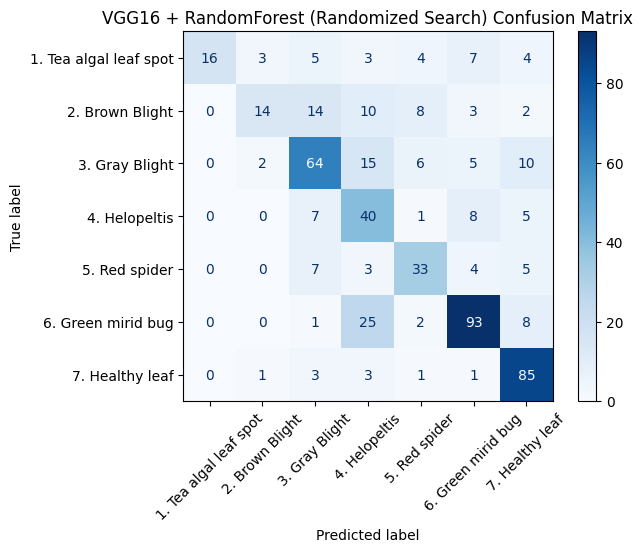

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/VGG16_RandomForest_best_model.pkl

🔹 Random search for SVM on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on VGG16: Acc=0.6968, Prec=0.7099, Rec=0.6968, F1=0.6873


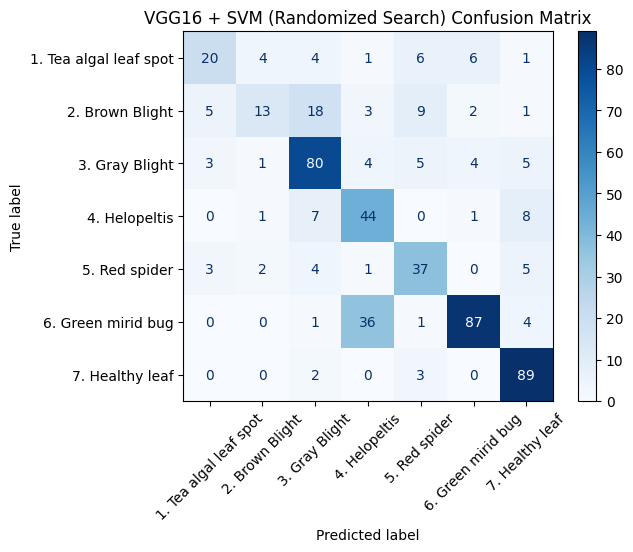

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/VGG16_SVM_best_model.pkl

🔹 Random search for XGBoost on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:37:17] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:37:17] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:37:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
XGBoost on VGG16: Acc=0.6648, Prec=0.6928, Rec=0.6648, F1=0.6641


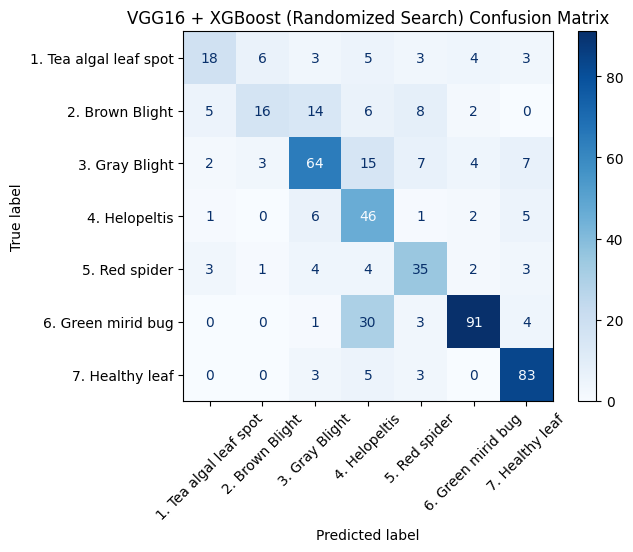

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/VGG16_XGBoost_best_model.pkl

=== Extracting features using ResNet50 ===
Found 7380 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


231/231 ━━━━━━━━━━━━━━━━━━━━ 1431s 6s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 107s 6s/step

=== Training ML classifiers on ResNet50 features with tuning ===

🔹 Random search for RandomForest on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on ResNet50: Acc=0.6685, Prec=0.6840, Rec=0.6685, F1=0.6599


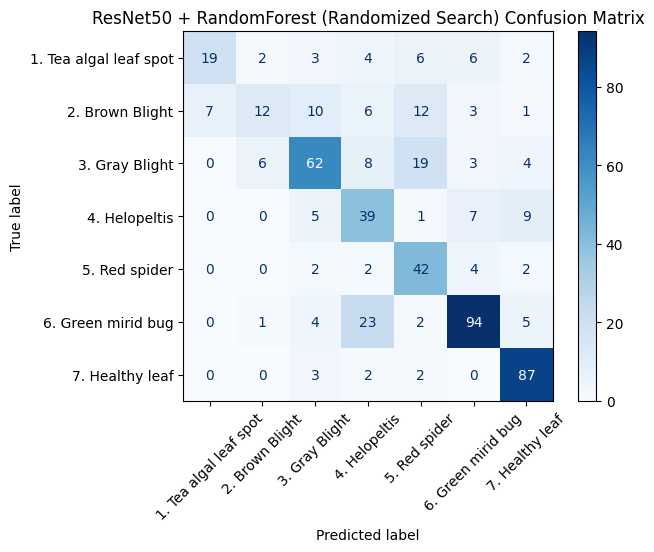

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/ResNet50_RandomForest_best_model.pkl

🔹 Random search for SVM on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on ResNet50: Acc=0.7589, Prec=0.7736, Rec=0.7589, F1=0.7579


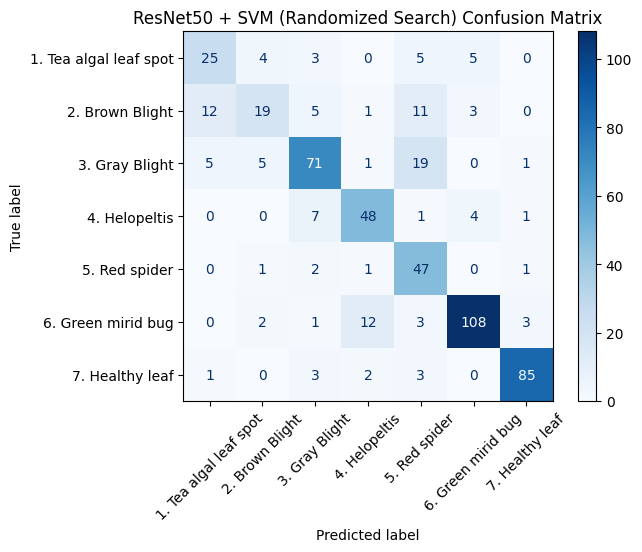

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/ResNet50_SVM_best_model.pkl

🔹 Random search for XGBoost on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:24:19] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:24:19] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:24:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on ResNet50: Acc=0.7156, Prec=0.7332, Rec=0.7156, F1=0.7153


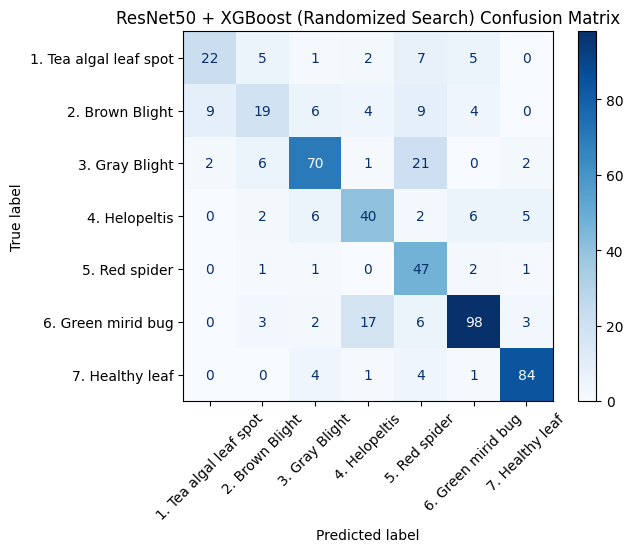

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/ResNet50_XGBoost_best_model.pkl

=== Extracting features using EfficientNetB1 ===
Found 7380 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


231/231 ━━━━━━━━━━━━━━━━━━━━ 817s 4s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step

=== Training ML classifiers on EfficientNetB1 features with tuning ===

🔹 Random search for RandomForest on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on EfficientNetB1: Acc=0.6629, Prec=0.6889, Rec=0.6629, F1=0.6596


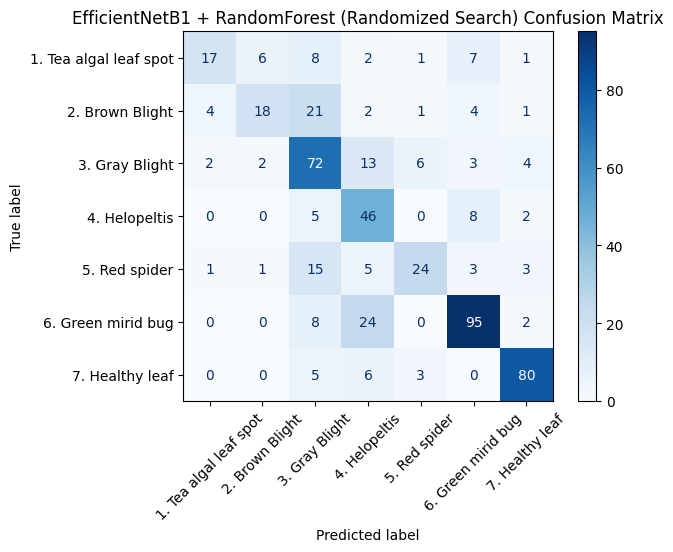

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/EfficientNetB1_RandomForest_best_model.pkl

🔹 Random search for SVM on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on EfficientNetB1: Acc=0.7382, Prec=0.7624, Rec=0.7382, F1=0.7415


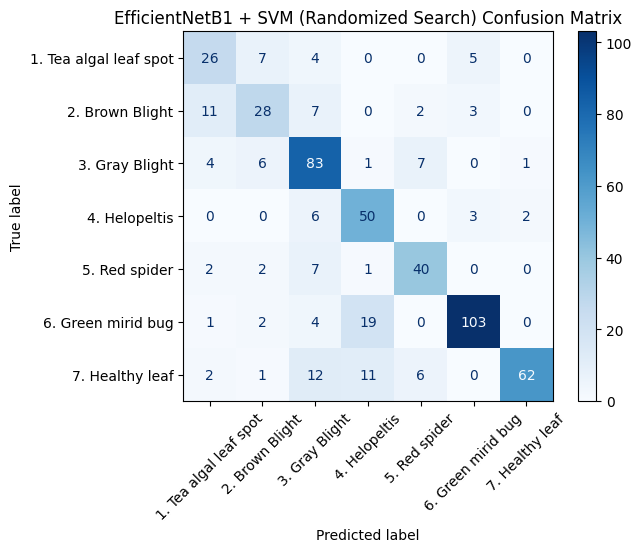

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/EfficientNetB1_SVM_best_model.pkl

🔹 Random search for XGBoost on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:33:26] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:33:26] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:33:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on EfficientNetB1: Acc=0.7006, Prec=0.7318, Rec=0.7006, F1=0.7070


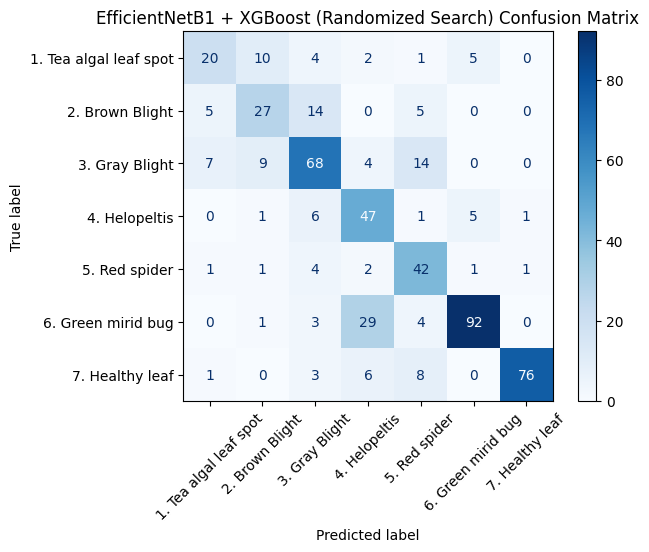

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/EfficientNetB1_XGBoost_best_model.pkl

=== Extracting features using MobileNetV2 ===
Found 7380 images belonging to 7 classes.
Found 531 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


231/231 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step

=== Training ML classifiers on MobileNetV2 features with tuning ===

🔹 Random search for RandomForest on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on MobileNetV2: Acc=0.6196, Prec=0.6287, Rec=0.6196, F1=0.5996


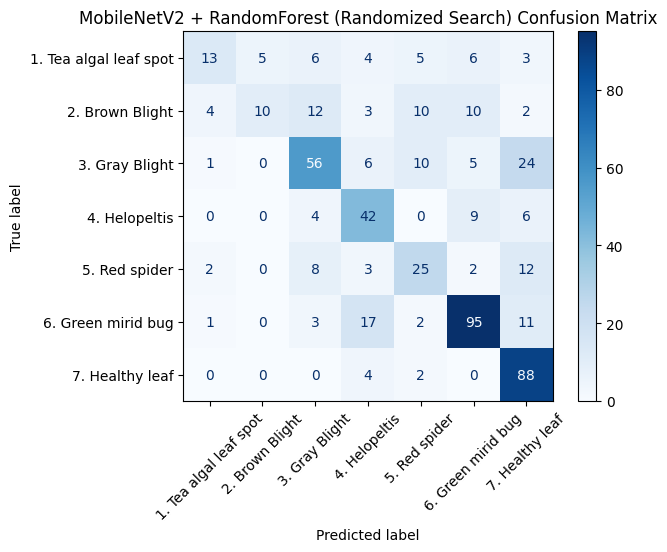

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/MobileNetV2_RandomForest_best_model.pkl

🔹 Random search for SVM on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on MobileNetV2: Acc=0.7250, Prec=0.7205, Rec=0.7250, F1=0.7164


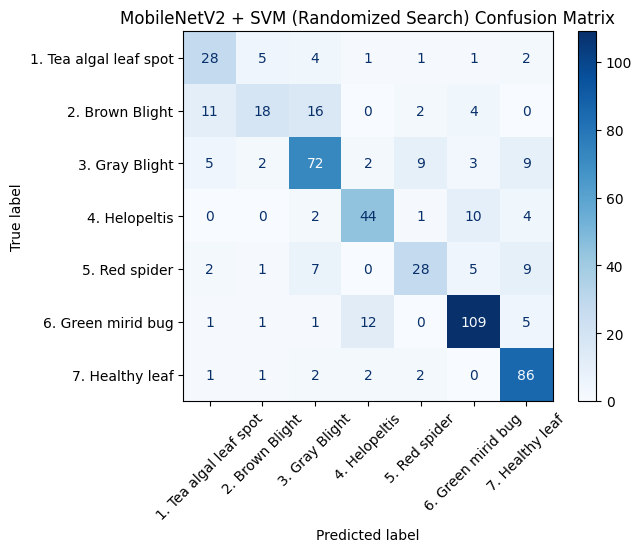

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/MobileNetV2_SVM_best_model.pkl

🔹 Random search for XGBoost on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:34:04] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:34:04] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:34:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on MobileNetV2: Acc=0.6648, Prec=0.6665, Rec=0.6648, F1=0.6576


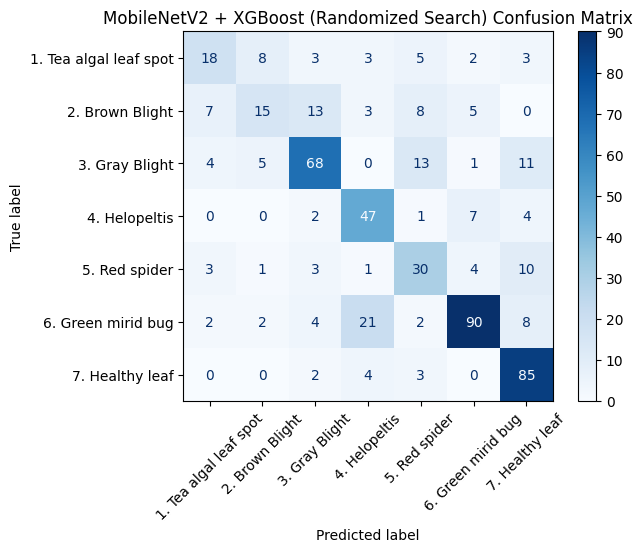

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_MultiWithAug/MobileNetV2_XGBoost_best_model.pkl

📊 All results saved to: /content/drive/MyDrive/TeaLeafModels/(Multiclass+Aug)Hybrid_Model_Results.csv


CNN_Model    Classifier  Accuracy  Precision    Recall  F1_Score  \
0            VGG16  RandomForest  0.649718   0.686387  0.649718  0.642513   
1            VGG16           SVM  0.696798   0.709937  0.696798  0.687346   
2            VGG16       XGBoost  0.664783   0.692819  0.664783  0.664102   
3         ResNet50  RandomForest  0.668550   0.683991  0.668550  0.659856   
4         ResNet50           SVM  0.758945   0.773640  0.758945  0.757862   
5         ResNet50       XGBoost  0.715631   0.733230  0.715631  0.715261   
6   EfficientNetB1  RandomForest  0.662900   0.688947  0.662900  0.659621   
7   EfficientNetB1           SVM  0.738230   0.762409  0.738230  0.741463   
8   EfficientNetB1       XGBoost  0.700565   0.731820  0.700565  0.706954   
9      MobileNetV2  RandomForest  0.619586   0.628696  0.619586  0.599629   
10     MobileNetV2           SVM  0.725047   0.720490  0.725047  0.716447   
11     MobileNetV2       XGBoost  0.664783   0.666521  0.664783  0.657596   

                                          Best_Params  
0   {'n_estimators': 200, 'min_samples_split': 5, ...  
1                         {'gamma': 'scale', 'C': 10}  
2   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
3   {'n_estimators': 200, 'min_samples_split': 5, ...  
4                         {'gamma': 'scale', 'C': 10}  
5   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
6   {'n_estimators': 200, 'min_samples_split': 5, ...  
7                         {'gamma': 'scale', 'C': 10}  
8   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
9   {'n_estimators': 200, 'min_samples_split': 5, ...  
10                        {'gamma': 'scale', 'C': 10}  
11  {'subsample': 0.8, 'n_estimators': 200, 'max_d...

In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Create save folder in Drive ===
save_dir = os.path.join(model_dir, 'Tuned_HyperHyb_MultiWithAug')
os.makedirs(save_dir, exist_ok=True)

results = []

for name, (cnn, preprocess_func) in cnn_models.items():
    print(f"\n=== Extracting features using {name} ===")

    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    X_train, y_train = extract_features(cnn, train_gen)
    X_test, y_test = extract_features(cnn, test_gen)

    class_names = list(train_gen.class_indices.keys())

    print(f"\n=== Training ML classifiers on {name} features with tuning ===")

    # === Classifiers with imbalance handling ===
    classifiers = {
        'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
        'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
        'XGBoost': XGBClassifier(
            use_label_encoder=False,
            eval_metric='mlogloss',
            tree_method='hist',  # GPU acceleration
            device='gpu',
            random_state=42
        )
    }

    # === Parameter distributions for random search ===
    param_distributions = {
        'RandomForest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'SVM': {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        },
        'XGBoost': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }

    # === Compute sample weights for XGBoost===
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    for clf_name, clf in classifiers.items():
        print(f"\n🔹 Random search for {clf_name} on {name} features ...")

        random_search = RandomizedSearchCV(
            clf,
            param_distributions=param_distributions[clf_name],
            n_iter=5,       # fewer combinations for speed
            cv=2,           # fewer folds for speed
            scoring='f1_weighted',  # better for imbalanced data
            n_jobs=-1,
            verbose=1,
            random_state=42
        )

        if clf_name == 'XGBoost':
            random_search.fit(X_train, y_train, sample_weight=sample_weights)
        else:
            random_search.fit(X_train, y_train)

        print(f"✅ Best parameters for {clf_name}: {random_search.best_params_}")

        best_clf = random_search.best_estimator_

        # === Evaluate tuned model ===
        y_pred = best_clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'CNN_Model': name,
            'Classifier': clf_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1_Score': f1,
            'Best_Params': random_search.best_params_
        })

        print(f"{clf_name} on {name}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

        # === Confusion Matrix ===
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap='Blues', xticks_rotation=45)
        plt.title(f'{name} + {clf_name} (Randomized Search) Confusion Matrix')
        plt.show()

        # === Save tuned model ===
        model_filename = f"{name}_{clf_name}_best_model.pkl"
        model_path = os.path.join(save_dir, model_filename)
        joblib.dump(best_clf, model_path)
        print(f"✅ Saved tuned model to Google Drive: {model_path}")

# === Save results as CSV ===
results_df = pd.DataFrame(results)
csv_path = os.path.join(model_dir, '(Multiclass+Aug)Hybrid_Model_Results.csv')
results_df.to_csv(csv_path, index=False)

print(f"\n📊 All results saved to: {csv_path}")
display(results_df)

## Hybrid CNN-Models (Without Augmentation Binary Classification)

In [ ]:
!pip install xgboost scikit-learn

In [ ]:
img_size = (224, 224)
batch_size = 32
test_dir = os.path.join(resized_dir, 'test_binary')
train_dir = os.path.join(resized_dir, 'train_binary')

datagen = ImageDataGenerator(preprocessing_function=vgg_preprocess)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_gen.class_indices)

Found 3690 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


In [ ]:
cnn_models = {
    'VGG16': (VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)), vgg_preprocess),
    'ResNet50': (ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)), resnet_preprocess),
    'EfficientNetB1': (EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224,224,3)), eff_preprocess),
    'MobileNetV2': (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3)), mob_preprocess),
}

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
def extract_features(model, generator):
    feature_model = Model(inputs=model.input, outputs=GlobalAveragePooling2D()(model.output))
    features = feature_model.predict(generator, verbose=1)
    labels = generator.classes
    return features, labels


=== Extracting features using VGG16 ===
Found 3690 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 2327s 20s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 327s 19s/step

=== Training ML classifiers on VGG16 features with tuning ===

🔹 Random search for RandomForest on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on VGG16: Acc=0.9379, Prec=0.9361, Rec=0.9379, F1=0.9363


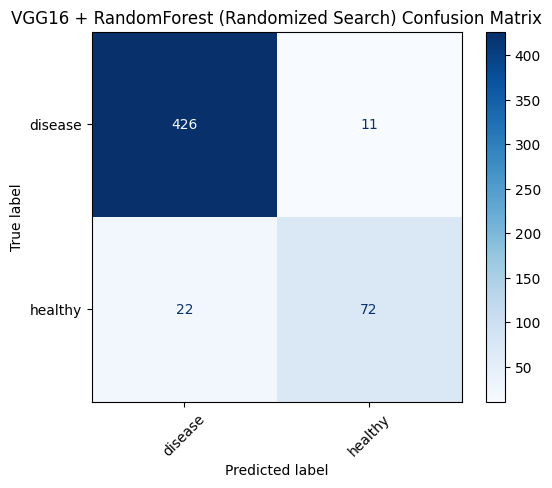

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/VGG16_RandomForest_best_model.pkl

🔹 Random search for SVM on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on VGG16: Acc=0.9623, Prec=0.9631, Rec=0.9623, F1=0.9626


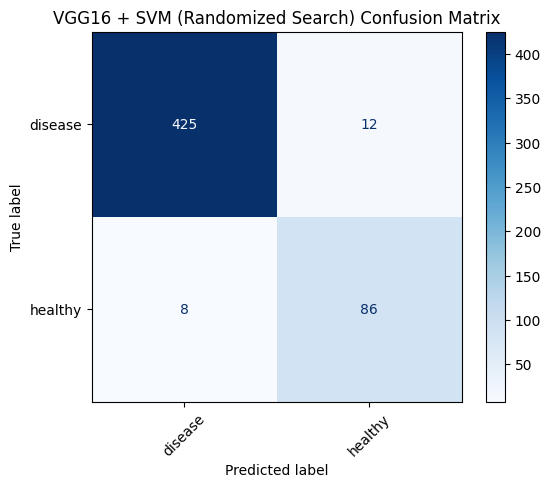

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/VGG16_SVM_best_model.pkl

🔹 Random search for XGBoost on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:26:57] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:26:57] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:26:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on VGG16: Acc=0.9623, Prec=0.9636, Rec=0.9623, F1=0.9628


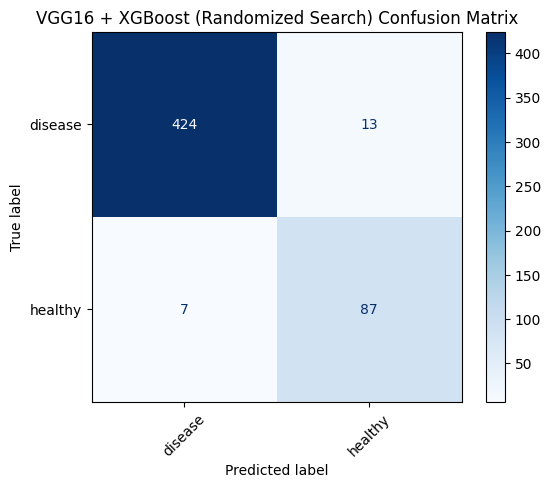

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/VGG16_XGBoost_best_model.pkl

=== Extracting features using ResNet50 ===
Found 3690 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 696s 6s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step

=== Training ML classifiers on ResNet50 features with tuning ===

🔹 Random search for RandomForest on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on ResNet50: Acc=0.9492, Prec=0.9483, Rec=0.9492, F1=0.9486


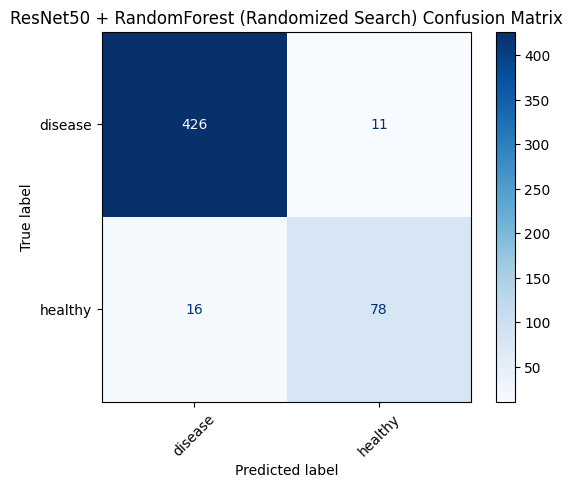

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/ResNet50_RandomForest_best_model.pkl

🔹 Random search for SVM on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on ResNet50: Acc=0.9774, Prec=0.9776, Rec=0.9774, F1=0.9775


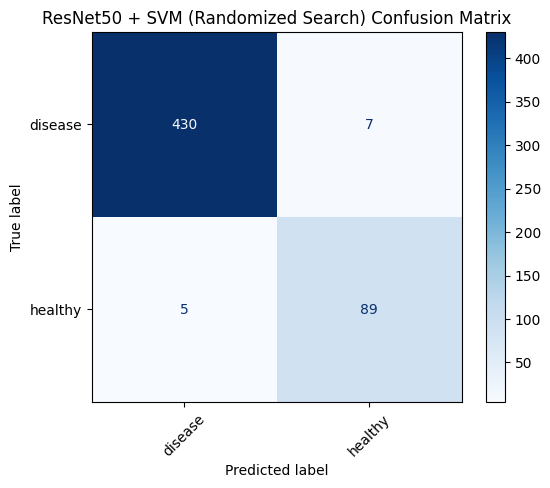

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/ResNet50_SVM_best_model.pkl

🔹 Random search for XGBoost on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:49:32] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:49:32] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:49:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on ResNet50: Acc=0.9623, Prec=0.9642, Rec=0.9623, F1=0.9629


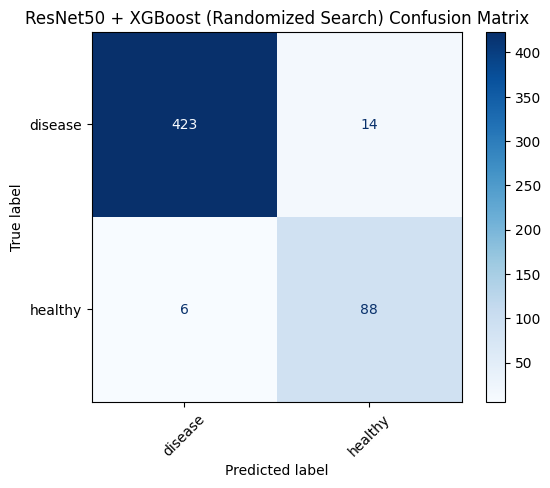

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/ResNet50_XGBoost_best_model.pkl

=== Extracting features using EfficientNetB1 ===
Found 3690 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 394s 3s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step

=== Training ML classifiers on EfficientNetB1 features with tuning ===

🔹 Random search for RandomForest on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on EfficientNetB1: Acc=0.9397, Prec=0.9383, Rec=0.9397, F1=0.9387


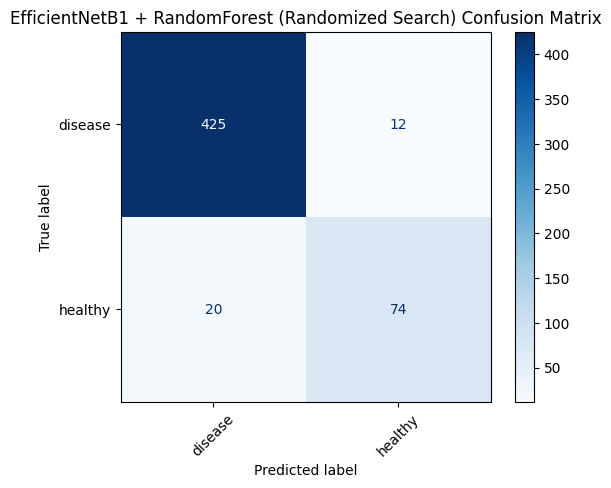

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/EfficientNetB1_RandomForest_best_model.pkl

🔹 Random search for SVM on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on EfficientNetB1: Acc=0.9774, Prec=0.9774, Rec=0.9774, F1=0.9774


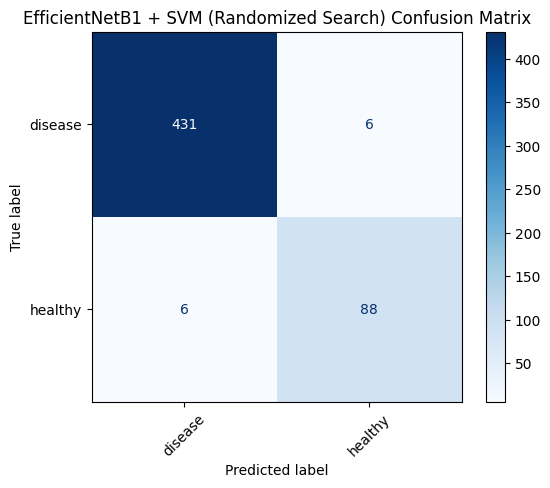

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/EfficientNetB1_SVM_best_model.pkl

🔹 Random search for XGBoost on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:05:35] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:05:35] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:05:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on EfficientNetB1: Acc=0.9586, Prec=0.9612, Rec=0.9586, F1=0.9594


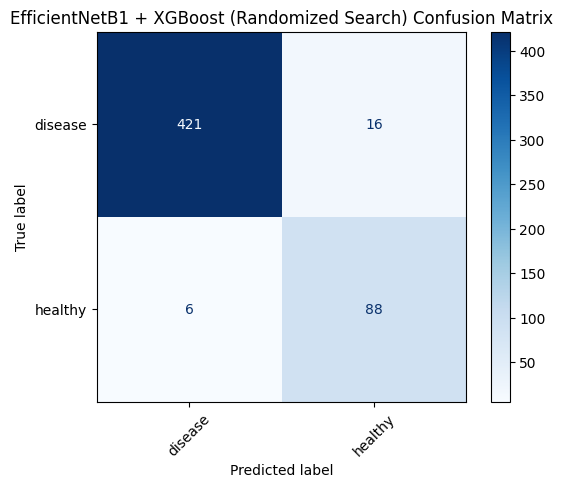

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/EfficientNetB1_XGBoost_best_model.pkl

=== Extracting features using MobileNetV2 ===
Found 3690 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step

=== Training ML classifiers on MobileNetV2 features with tuning ===

🔹 Random search for RandomForest on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on MobileNetV2: Acc=0.9360, Prec=0.9341, Rec=0.9360, F1=0.9342


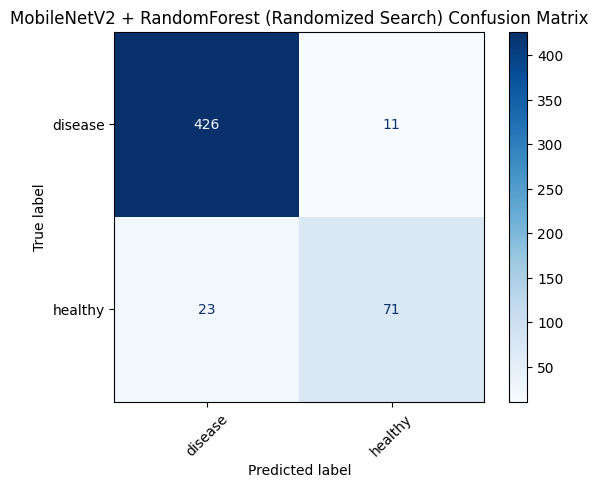

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/MobileNetV2_RandomForest_best_model.pkl

🔹 Random search for SVM on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on MobileNetV2: Acc=0.9718, Prec=0.9716, Rec=0.9718, F1=0.9717


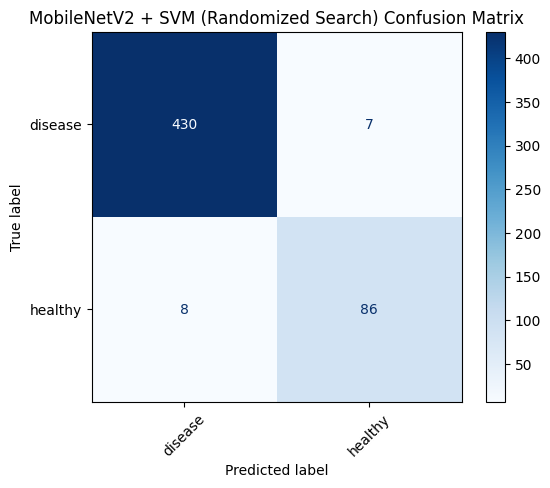

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/MobileNetV2_SVM_best_model.pkl

🔹 Random search for XGBoost on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:15:08] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:15:08] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:15:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on MobileNetV2: Acc=0.9454, Prec=0.9474, Rec=0.9454, F1=0.9461


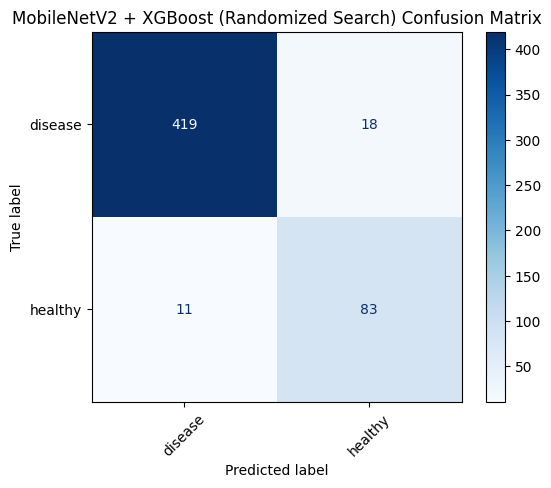

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithoutAug/MobileNetV2_XGBoost_best_model.pkl

📊 All results saved to: /content/drive/MyDrive/TeaLeafModels/(Multiclass+NoAug)Hybrid_Model_Results.csv


CNN_Model    Classifier  Accuracy  Precision    Recall  F1_Score  \
0            VGG16  RandomForest  0.937853   0.936125  0.937853  0.936308   
1            VGG16           SVM  0.962335   0.963118  0.962335  0.962641   
2            VGG16       XGBoost  0.962335   0.963621  0.962335  0.962787   
3         ResNet50  RandomForest  0.949153   0.948330  0.949153  0.948603   
4         ResNet50           SVM  0.977401   0.977632  0.977401  0.977494   
5         ResNet50       XGBoost  0.962335   0.964192  0.962335  0.962930   
6   EfficientNetB1  RandomForest  0.939736   0.938311  0.939736  0.938670   
7   EfficientNetB1           SVM  0.977401   0.977401  0.977401  0.977401   
8   EfficientNetB1       XGBoost  0.958569   0.961201  0.958569  0.959375   
9      MobileNetV2  RandomForest  0.935970   0.934096  0.935970  0.934221   
10     MobileNetV2           SVM  0.971751   0.971644  0.971751  0.971692   
11     MobileNetV2       XGBoost  0.945386   0.947398  0.945386  0.946146   

                                          Best_Params  
0   {'n_estimators': 200, 'min_samples_split': 5, ...  
1                         {'gamma': 'scale', 'C': 10}  
2   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
3   {'n_estimators': 200, 'min_samples_split': 5, ...  
4                         {'gamma': 'scale', 'C': 10}  
5   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
6   {'n_estimators': 100, 'min_samples_split': 2, ...  
7                         {'gamma': 'scale', 'C': 10}  
8   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
9   {'n_estimators': 100, 'min_samples_split': 2, ...  
10                        {'gamma': 'scale', 'C': 10}  
11  {'subsample': 0.8, 'n_estimators': 200, 'max_d...

In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Create save folder in Drive ===
save_dir = os.path.join(model_dir, 'Tuned_HyperHyb_BiWithoutAug')
os.makedirs(save_dir, exist_ok=True)

results = []  # to store evaluation metrics + best params

for name, (cnn, preprocess_func) in cnn_models.items():
    print(f"\n=== Extracting features using {name} ===")

    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    X_train, y_train = extract_features(cnn, train_gen)
    X_test, y_test = extract_features(cnn, test_gen)

    class_names = list(train_gen.class_indices.keys())

    print(f"\n=== Training ML classifiers on {name} features with tuning ===")

    # === Classifiers with imbalance handling ===
    classifiers = {
        'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
        'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
        'XGBoost': XGBClassifier(
            use_label_encoder=False,
            eval_metric='mlogloss',
            tree_method='hist',  # GPU acceleration
            device='gpu',
            random_state=42
        )
    }

    # === Parameter distributions for random search ===
    param_distributions = {
        'RandomForest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'SVM': {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        },
        'XGBoost': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }

    # === Compute sample weights for XGBoost ===
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    for clf_name, clf in classifiers.items():
        print(f"\n🔹 Random search for {clf_name} on {name} features ...")

        random_search = RandomizedSearchCV(
            clf,
            param_distributions=param_distributions[clf_name],
            n_iter=5,       # fewer combinations for speed
            cv=2,           # fewer folds for speed
            scoring='f1_weighted',  # better for imbalanced data
            n_jobs=-1,
            verbose=1,
            random_state=42
        )

        if clf_name == 'XGBoost':
            random_search.fit(X_train, y_train, sample_weight=sample_weights)
        else:
            random_search.fit(X_train, y_train)

        print(f"✅ Best parameters for {clf_name}: {random_search.best_params_}")

        best_clf = random_search.best_estimator_

        # === Evaluate tuned model ===
        y_pred = best_clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'CNN_Model': name,
            'Classifier': clf_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1_Score': f1,
            'Best_Params': random_search.best_params_
        })

        print(f"{clf_name} on {name}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

        # === Confusion Matrix ===
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap='Blues', xticks_rotation=45)
        plt.title(f'{name} + {clf_name} (Randomized Search) Confusion Matrix')
        plt.show()

        # === Save tuned model ===
        model_filename = f"{name}_{clf_name}_best_model.pkl"
        model_path = os.path.join(save_dir, model_filename)
        joblib.dump(best_clf, model_path)
        print(f"✅ Saved tuned model to Google Drive: {model_path}")

# === Save results as CSV ===
results_df = pd.DataFrame(results)
csv_path = os.path.join(model_dir, '(Biclass+NoAug)Hybrid_Model_Results.csv')
results_df.to_csv(csv_path, index=False)

print(f"\n📊 All results saved to: {csv_path}")
display(results_df)

## Hybrid CNN-Models (With Augmentation Binary Classification)

In [ ]:
!pip install xgboost scikit-learn

In [ ]:
img_size = (224, 224)
batch_size = 32
test_dir = os.path.join(resized_dir, 'test_binary')
train_dir = os.path.join(augmented_dir, 'train_binary')

datagen = ImageDataGenerator(preprocessing_function=vgg_preprocess)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_gen.class_indices)

Found 7380 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


In [ ]:
cnn_models = {
    'VGG16': (VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)), vgg_preprocess),
    'ResNet50': (ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)), resnet_preprocess),
    'EfficientNetB1': (EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224,224,3)), eff_preprocess),
    'MobileNetV2': (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3)), mob_preprocess),
}

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def extract_features(model, generator):
    feature_model = Model(inputs=model.input, outputs=GlobalAveragePooling2D()(model.output))
    features = feature_model.predict(generator, verbose=1)
    labels = generator.classes
    return features, labels


=== Extracting features using VGG16 ===
Found 7380 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


231/231 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 200s 12s/step

=== Training ML classifiers on VGG16 features with tuning ===

🔹 Random search for RandomForest on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on VGG16: Acc=0.9322, Prec=0.9308, Rec=0.9322, F1=0.9313


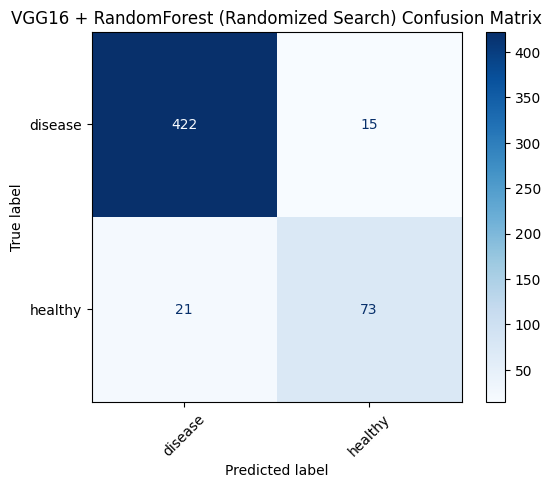

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/VGG16_RandomForest_best_model.pkl

🔹 Random search for SVM on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on VGG16: Acc=0.9473, Prec=0.9503, Rec=0.9473, F1=0.9483


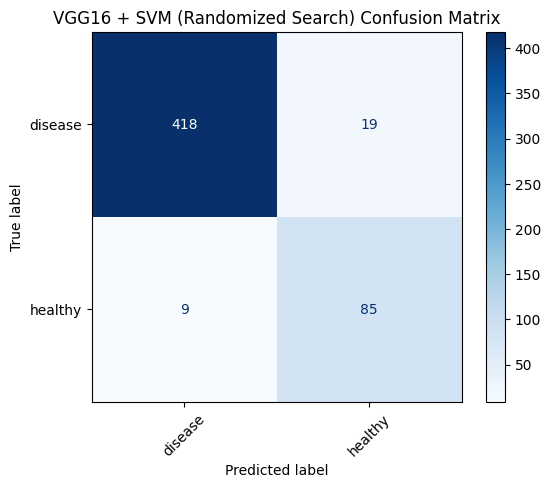

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/VGG16_SVM_best_model.pkl

🔹 Random search for XGBoost on VGG16 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:43:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on VGG16: Acc=0.9379, Prec=0.9425, Rec=0.9379, F1=0.9394


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [09:43:00] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


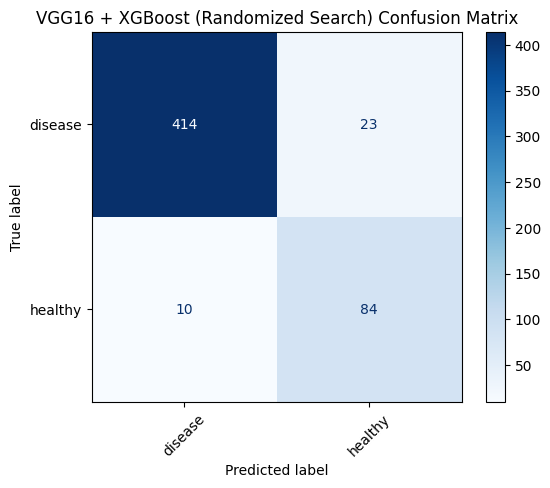

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/VGG16_XGBoost_best_model.pkl

=== Extracting features using ResNet50 ===
Found 7380 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


231/231 ━━━━━━━━━━━━━━━━━━━━ 91s 173ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 445ms/step

=== Training ML classifiers on ResNet50 features with tuning ===

🔹 Random search for RandomForest on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✅ Best parameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on ResNet50: Acc=0.9454, Prec=0.9441, Rec=0.9454, F1=0.9438


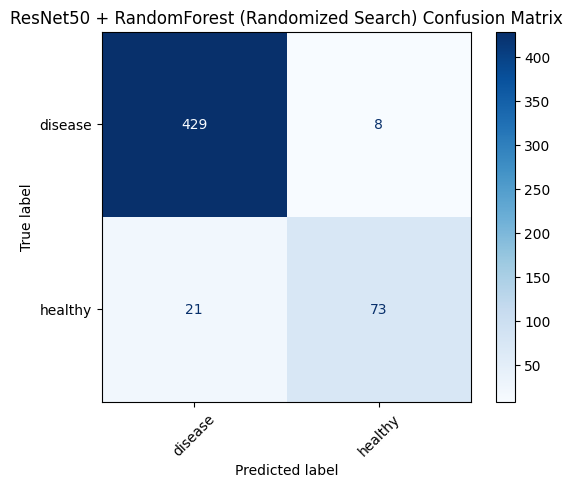

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/ResNet50_RandomForest_best_model.pkl

🔹 Random search for SVM on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on ResNet50: Acc=0.9567, Prec=0.9568, Rec=0.9567, F1=0.9549


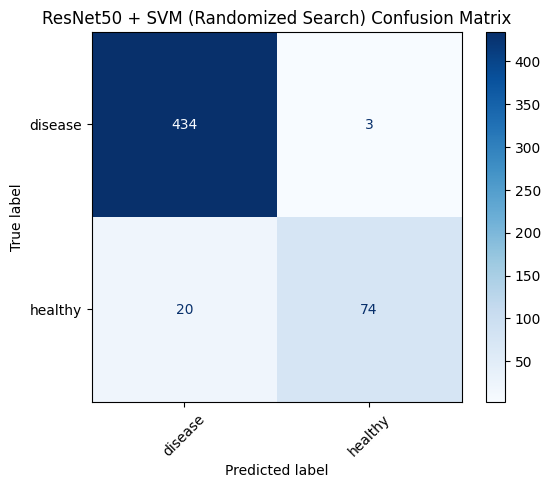

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/ResNet50_SVM_best_model.pkl

🔹 Random search for XGBoost on ResNet50 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:52:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on ResNet50: Acc=0.9586, Prec=0.9583, Rec=0.9586, F1=0.9584


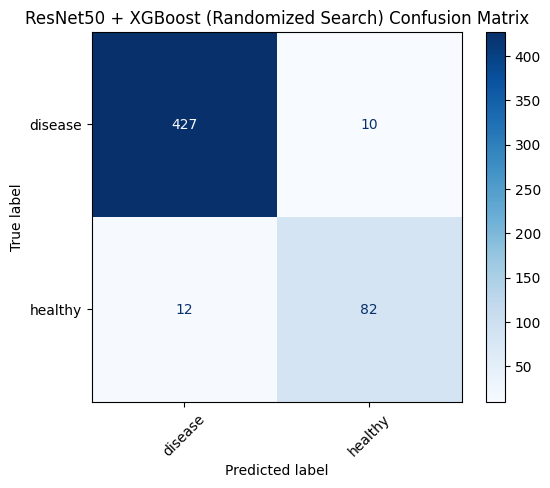

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/ResNet50_XGBoost_best_model.pkl

=== Extracting features using EfficientNetB1 ===
Found 7380 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


231/231 ━━━━━━━━━━━━━━━━━━━━ 107s 204ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step

=== Training ML classifiers on EfficientNetB1 features with tuning ===

🔹 Random search for RandomForest on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on EfficientNetB1: Acc=0.9397, Prec=0.9406, Rec=0.9397, F1=0.9358


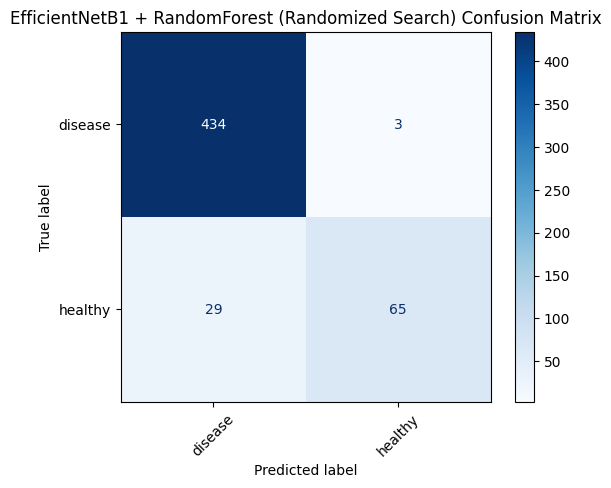

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/EfficientNetB1_RandomForest_best_model.pkl

🔹 Random search for SVM on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on EfficientNetB1: Acc=0.9303, Prec=0.9342, Rec=0.9303, F1=0.9237


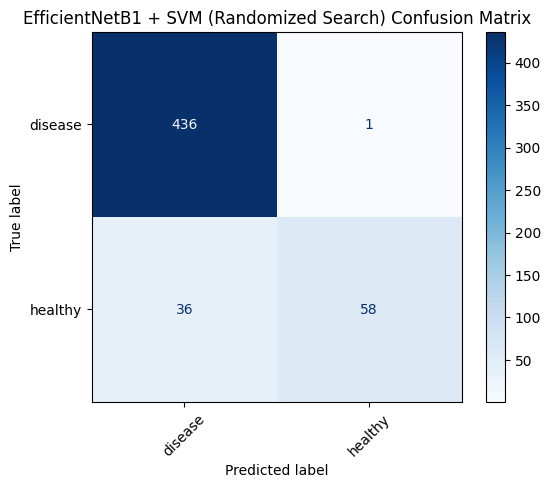

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/EfficientNetB1_SVM_best_model.pkl

🔹 Random search for XGBoost on EfficientNetB1 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:02:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on EfficientNetB1: Acc=0.9548, Prec=0.9546, Rec=0.9548, F1=0.9531


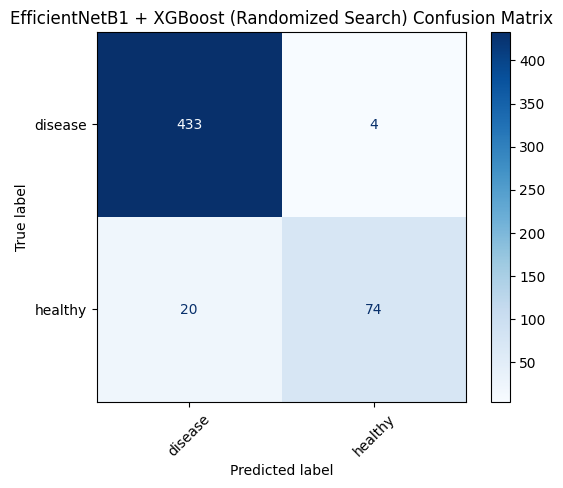

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/EfficientNetB1_XGBoost_best_model.pkl

=== Extracting features using MobileNetV2 ===
Found 7380 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


231/231 ━━━━━━━━━━━━━━━━━━━━ 85s 305ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 705ms/step

=== Training ML classifiers on MobileNetV2 features with tuning ===

🔹 Random search for RandomForest on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
RandomForest on MobileNetV2: Acc=0.9058, Prec=0.9173, Rec=0.9058, F1=0.9096


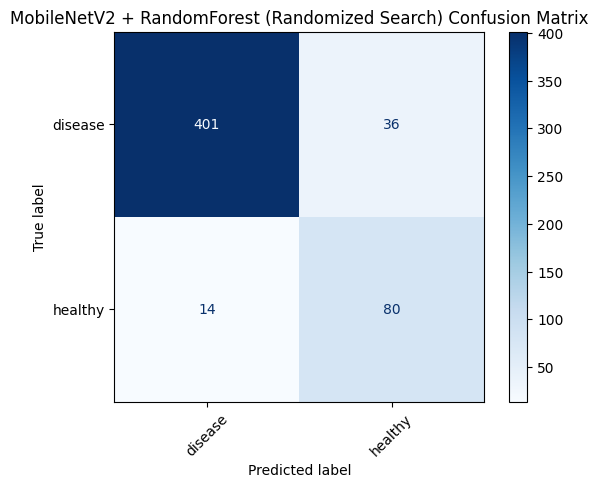

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/MobileNetV2_RandomForest_best_model.pkl

🔹 Random search for SVM on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best parameters for SVM: {'gamma': 'scale', 'C': 10}
SVM on MobileNetV2: Acc=0.9548, Prec=0.9563, Rec=0.9548, F1=0.9553


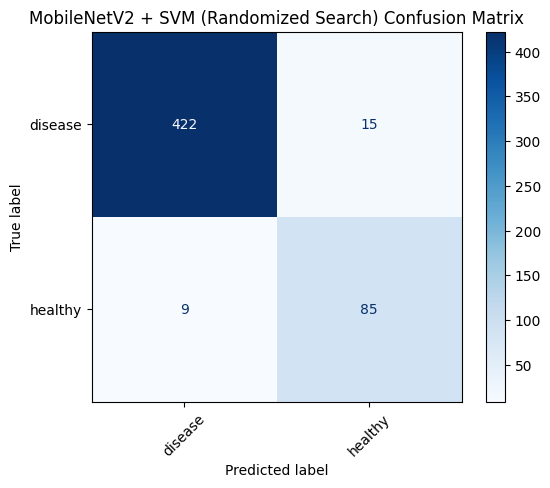

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/MobileNetV2_SVM_best_model.pkl

🔹 Random search for XGBoost on MobileNetV2 features ...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:10:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
XGBoost on MobileNetV2: Acc=0.9209, Prec=0.9365, Rec=0.9209, F1=0.9249


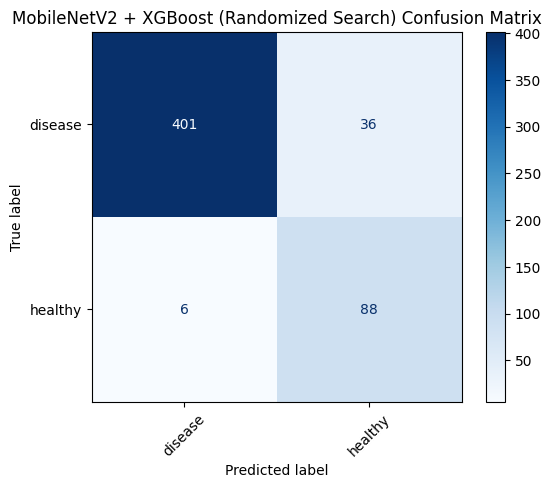

✅ Saved tuned model to Google Drive: /content/drive/MyDrive/TeaLeafModels/Tuned_HyperHyb_BiWithAug/MobileNetV2_XGBoost_best_model.pkl

📊 All results saved to: /content/drive/MyDrive/TeaLeafModels/(Biclass+Aug)Hybrid_Model_Results.csv


CNN_Model    Classifier  Accuracy  Precision    Recall  F1_Score  \
0            VGG16  RandomForest  0.932203   0.930813  0.932203  0.931317   
1            VGG16           SVM  0.947269   0.950313  0.947269  0.948296   
2            VGG16       XGBoost  0.937853   0.942538  0.937853  0.939394   
3         ResNet50  RandomForest  0.945386   0.944111  0.945386  0.943758   
4         ResNet50           SVM  0.956685   0.956849  0.956685  0.954946   
5         ResNet50       XGBoost  0.958569   0.958262  0.958569  0.958393   
6   EfficientNetB1  RandomForest  0.939736   0.940643  0.939736  0.935771   
7   EfficientNetB1           SVM  0.930320   0.934230  0.930320  0.923692   
8   EfficientNetB1       XGBoost  0.954802   0.954587  0.954802  0.953106   
9      MobileNetV2  RandomForest  0.905838   0.917298  0.905838  0.909555   
10     MobileNetV2           SVM  0.954802   0.956261  0.954802  0.955345   
11     MobileNetV2       XGBoost  0.920904   0.936473  0.920904  0.924941   

                                          Best_Params  
0   {'n_estimators': 200, 'min_samples_split': 5, ...  
1                         {'gamma': 'scale', 'C': 10}  
2   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
3   {'n_estimators': 100, 'min_samples_split': 2, ...  
4                         {'gamma': 'scale', 'C': 10}  
5   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
6   {'n_estimators': 200, 'min_samples_split': 5, ...  
7                         {'gamma': 'scale', 'C': 10}  
8   {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
9   {'n_estimators': 200, 'min_samples_split': 5, ...  
10                        {'gamma': 'scale', 'C': 10}  
11  {'subsample': 0.8, 'n_estimators': 200, 'max_d...

In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Create save folder in Drive ===
save_dir = os.path.join(model_dir, 'Tuned_HyperHyb_BiWithAug')
os.makedirs(save_dir, exist_ok=True)

results = []  # to store evaluation metrics + best params

for name, (cnn, preprocess_func) in cnn_models.items():
    print(f"\n=== Extracting features using {name} ===")

    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    X_train, y_train = extract_features(cnn, train_gen)
    X_test, y_test = extract_features(cnn, test_gen)

    class_names = list(train_gen.class_indices.keys())

    print(f"\n=== Training ML classifiers on {name} features with tuning ===")

    # === Classifiers with imbalance handling ===
    classifiers = {
        'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
        'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
        'XGBoost': XGBClassifier(
            use_label_encoder=False,
            eval_metric='mlogloss',
            tree_method='hist',  # GPU acceleration
            device='gpu',
            random_state=42
        )
    }

    # === Parameter distributions for random search ===
    param_distributions = {
        'RandomForest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'SVM': {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        },
        'XGBoost': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }

    # === Compute sample weights for XGBoost===
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    for clf_name, clf in classifiers.items():
        print(f"\n🔹 Random search for {clf_name} on {name} features ...")

        random_search = RandomizedSearchCV(
            clf,
            param_distributions=param_distributions[clf_name],
            n_iter=5,       # fewer combinations for speed
            cv=2,           # fewer folds for speed
            scoring='f1_weighted',  # better for imbalanced data
            n_jobs=-1,
            verbose=1,
            random_state=42
        )

        if clf_name == 'XGBoost':
            random_search.fit(X_train, y_train, sample_weight=sample_weights)
        else:
            random_search.fit(X_train, y_train)

        print(f"✅ Best parameters for {clf_name}: {random_search.best_params_}")

        best_clf = random_search.best_estimator_

        # === Evaluate tuned model ===
        y_pred = best_clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'CNN_Model': name,
            'Classifier': clf_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1_Score': f1,
            'Best_Params': random_search.best_params_
        })

        print(f"{clf_name} on {name}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

        # === Confusion Matrix ===
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap='Blues', xticks_rotation=45)
        plt.title(f'{name} + {clf_name} (Randomized Search) Confusion Matrix')
        plt.show()

        # === Save tuned model ===
        model_filename = f"{name}_{clf_name}_best_model.pkl"
        model_path = os.path.join(save_dir, model_filename)
        joblib.dump(best_clf, model_path)
        print(f"✅ Saved tuned model to Google Drive: {model_path}")

# === Save results as CSV ===
results_df = pd.DataFrame(results)
csv_path = os.path.join(model_dir, '(Biclass+Aug)Hybrid_Model_Results.csv')
results_df.to_csv(csv_path, index=False)

print(f"\n📊 All results saved to: {csv_path}")
display(results_df)

# CNN Visualization (Grad-Cam)

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
def get_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("❌ No Conv2D layer found.")

In [ ]:
def generate_gradcam(model, img_path, preprocess_fn, model_name, class_name, save_folder):
    img = load_img(img_path, target_size=(224, 224))
    img_arr = img_to_array(img)
    img_pre = preprocess_fn(img_arr.copy())
    img_pre = np.expand_dims(img_pre, axis=0)

    preds = model.predict(img_pre)
    class_index = np.argmax(preds[0])

    last_conv_name = get_last_conv_layer(model)
    last_conv_layer = model.get_layer(last_conv_name)

    grad_model = Model(
        inputs=model.input,
        outputs=[last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_pre)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    if heatmap.max() != 0:
        heatmap = heatmap / heatmap.max()
    else:
        heatmap = heatmap  # all zeros
    heatmap = np.uint8(255 * heatmap)

    heatmap = cv2.resize(heatmap, (img_arr.shape[1], img_arr.shape[0]))
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed = cv2.addWeighted(img_arr.astype(np.uint8), 0.6, heatmap_color, 0.4, 0)

    save_path = os.path.join(save_folder, f"{model_name}_{class_name}.jpg")
    cv2.imwrite(save_path, superimposed)

    print(f"✅ Saved Grad-CAM: {save_path}")

In [ ]:
def generate_gradcam(model, img_path, preprocess_fn, model_name, class_name, save_dir):

    img = load_img(img_path, target_size=(224, 224))
    img_arr = img_to_array(img)
    img_pre = preprocess_fn(img_arr.copy())
    img_pre = np.expand_dims(img_pre, axis=0)

    # 🔥 FIX — handle named input layer models
    try:
        model_input_name = model.input_names[0]
        preds = model.predict({model_input_name: img_pre}, verbose=0)
    except:
        preds = model.predict(img_pre, verbose=0)

    # If prediction still fails
    if preds is None or len(preds) == 0:
        print(f"❌ Prediction failed for {model_name}, {class_name}")
        return None

    class_index = np.argmax(preds[0])

    last_conv = get_last_conv_layer(model)
    grad_model = Model([model.input],
                       [model.get_layer(last_conv).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_pre)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_output = conv_output[0].numpy()
    pooled_grads = pooled_grads.numpy()

    for i in range(pooled_grads.shape[-1]):
        conv_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_output, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap = heatmap / (heatmap.max() + 1e-8)

    heatmap = cv2.resize(heatmap, (img_arr.shape[1], img_arr.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(img_arr.astype("uint8"), 0.6, heatmap_color, 0.4, 0)

    save_path = f"{save_dir}/{model_name}_{class_name}.jpg"
    cv2.imwrite(save_path, overlay)

    print(f"✅ Saved Grad-CAM: {save_path}")

    return class_index


In [ ]:
def get_first_image(directory):
    for file in sorted(os.listdir(directory)):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            return os.path.join(directory, file)
    return None

### Grad-Cam (Multiclass Without Augmentation)

In [ ]:
save_folder = "/content/drive/MyDrive/gradcam_Multiclass_withoutAug"
os.makedirs(save_folder, exist_ok=True)

In [ ]:
import pandas as pd

gradcam_results = []   # store results for table

In [ ]:
test_dir = os.path.join(resized_dir, 'test')        # your test folder

vgg_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Multiclass_without_augmented_models/VGG16.h5")
mob_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Multiclass_without_augmented_models/MobileNetV2.h5")
eff_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Multiclass_without_augmented_models/EfficientNetB1.h5")
res_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Multiclass_without_augmented_models/ResNet50.h5")

models_info = [
    ("VGG16", vgg_model, tf.keras.applications.vgg16.preprocess_input),
    ("MobileNetV2", mob_model, tf.keras.applications.mobilenet_v2.preprocess_input),
    ("EfficientNetB1", eff_model, tf.keras.applications.efficientnet.preprocess_input),
    ("ResNet50", res_model, tf.keras.applications.resnet50.preprocess_input),
]

# class_labels from your test folder
class_labels = sorted(os.listdir(test_dir))

for model_name, model, preprocess_fn in models_info:
    print(f"\n🔍 Processing {model_name} ...")

    for class_name in class_labels:
        class_dir = os.path.join(test_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Choose FIRST image from that folder
        img_file = sorted(os.listdir(class_dir))[0]
        img_path = os.path.join(class_dir, img_file)

        print(f"➡ Generating Grad-CAM for {model_name} on {class_name}")

        pred_index = generate_gradcam(
            model, img_path, preprocess_fn, model_name, class_name, save_folder
        )

        predicted_class = class_labels[pred_index]

        gradcam_results.append({
            "Model": model_name,
            "True Class": class_name,
            "Predicted Class": predicted_class,
            "Image Used": img_file
        })

        print(f"   ✔ Predicted as: {predicted_class}")


🔍 Processing VGG16 ...
➡ Generating Grad-CAM for VGG16 on 1. Tea algal leaf spot


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/VGG16_1. Tea algal leaf spot.jpg
   ✔ Predicted as: 6. Green mirid bug
➡ Generating Grad-CAM for VGG16 on 2. Brown Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/VGG16_2. Brown Blight.jpg
   ✔ Predicted as: 2. Brown Blight
➡ Generating Grad-CAM for VGG16 on 3. Gray Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/VGG16_3. Gray Blight.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for VGG16 on 4. Helopeltis
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/VGG16_4. Helopeltis.jpg
   ✔ Predicted as: 2. Brown Blight
➡ Generating Grad-CAM for VGG16 on 5. Red spider
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/VGG16_5. Red spider.jpg
   ✔ Predicted as: 2. Brown Blight
➡ Generating Grad-CAM for VGG16 on 6. Green mirid bug
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/VGG16_6. Gre

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_3']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/MobileNetV2_1. Tea algal leaf spot.jpg
   ✔ Predicted as: 6. Green mirid bug
➡ Generating Grad-CAM for MobileNetV2 on 2. Brown Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/MobileNetV2_2. Brown Blight.jpg
   ✔ Predicted as: 2. Brown Blight
➡ Generating Grad-CAM for MobileNetV2 on 3. Gray Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/MobileNetV2_3. Gray Blight.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for MobileNetV2 on 4. Helopeltis
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/MobileNetV2_4. Helopeltis.jpg
   ✔ Predicted as: 7. Healthy leaf
➡ Generating Grad-CAM for MobileNetV2 on 5. Red spider
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/MobileNetV2_5. Red spider.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for MobileNetV2 on 6. Green mirid bug
✅ Saved Grad-CAM: /conte

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_2']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/EfficientNetB1_1. Tea algal leaf spot.jpg
   ✔ Predicted as: 7. Healthy leaf
➡ Generating Grad-CAM for EfficientNetB1 on 2. Brown Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/EfficientNetB1_2. Brown Blight.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for EfficientNetB1 on 3. Gray Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/EfficientNetB1_3. Gray Blight.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for EfficientNetB1 on 4. Helopeltis
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/EfficientNetB1_4. Helopeltis.jpg
   ✔ Predicted as: 7. Healthy leaf
➡ Generating Grad-CAM for EfficientNetB1 on 5. Red spider
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/EfficientNetB1_5. Red spider.jpg
   ✔ Predicted as: 5. Red spider
➡ Generating Grad-CAM for EfficientNetB1 on 6. Green mirid bug

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/ResNet50_1. Tea algal leaf spot.jpg
   ✔ Predicted as: 1. Tea algal leaf spot
➡ Generating Grad-CAM for ResNet50 on 2. Brown Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/ResNet50_2. Brown Blight.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for ResNet50 on 3. Gray Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/ResNet50_3. Gray Blight.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for ResNet50 on 4. Helopeltis
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/ResNet50_4. Helopeltis.jpg
   ✔ Predicted as: 7. Healthy leaf
➡ Generating Grad-CAM for ResNet50 on 5. Red spider
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withoutAug/ResNet50_5. Red spider.jpg
   ✔ Predicted as: 5. Red spider
➡ Generating Grad-CAM for ResNet50 on 6. Green mirid bug
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Mul

In [ ]:
df = pd.DataFrame(gradcam_results)
df

Model              True Class         Predicted Class  \
0            VGG16  1. Tea algal leaf spot      6. Green mirid bug   
1            VGG16         2. Brown Blight         2. Brown Blight   
2            VGG16          3. Gray Blight          3. Gray Blight   
3            VGG16           4. Helopeltis         2. Brown Blight   
4            VGG16           5. Red spider         2. Brown Blight   
5            VGG16      6. Green mirid bug      6. Green mirid bug   
6            VGG16         7. Healthy leaf         7. Healthy leaf   
7      MobileNetV2  1. Tea algal leaf spot      6. Green mirid bug   
8      MobileNetV2         2. Brown Blight         2. Brown Blight   
9      MobileNetV2          3. Gray Blight          3. Gray Blight   
10     MobileNetV2           4. Helopeltis         7. Healthy leaf   
11     MobileNetV2           5. Red spider          3. Gray Blight   
12     MobileNetV2      6. Green mirid bug      6. Green mirid bug   
13     MobileNetV2         7. Healthy leaf         7. Healthy leaf   
14  EfficientNetB1  1. Tea algal leaf spot         7. Healthy leaf   
15  EfficientNetB1         2. Brown Blight          3. Gray Blight   
16  EfficientNetB1          3. Gray Blight          3. Gray Blight   
17  EfficientNetB1           4. Helopeltis         7. Healthy leaf   
18  EfficientNetB1           5. Red spider           5. Red spider   
19  EfficientNetB1      6. Green mirid bug      6. Green mirid bug   
20  EfficientNetB1         7. Healthy leaf         7. Healthy leaf   
21        ResNet50  1. Tea algal leaf spot  1. Tea algal leaf spot   
22        ResNet50         2. Brown Blight          3. Gray Blight   
23        ResNet50          3. Gray Blight          3. Gray Blight   
24        ResNet50           4. Helopeltis         7. Healthy leaf   
25        ResNet50           5. Red spider           5. Red spider   
26        ResNet50      6. Green mirid bug      6. Green mirid bug   
27        ResNet50         7. Healthy leaf         7. Healthy leaf   

                       Image Used  
0   tea_algal_leaf_spot_00008.jpg  
1          brown_blight_00003.jpg  
2           gray_blight_00010.jpg  
3            helopeltis_00001.jpg  
4            red_spider_00001.jpg  
5       green_mirid_bug_00032.jpg  
6               healthy_00008.jpg  
7   tea_algal_leaf_spot_00008.jpg  
8          brown_blight_00003.jpg  
9           gray_blight_00010.jpg  
10           helopeltis_00001.jpg  
11           red_spider_00001.jpg  
12      green_mirid_bug_00032.jpg  
13              healthy_00008.jpg  
14  tea_algal_leaf_spot_00008.jpg  
15         brown_blight_00003.jpg  
16          gray_blight_00010.jpg  
17           helopeltis_00001.jpg  
18           red_spider_00001.jpg  
19      green_mirid_bug_00032.jpg  
20              healthy_00008.jpg  
21  tea_algal_leaf_spot_00008.jpg  
22         brown_blight_00003.jpg  
23          gray_blight_00010.jpg  
24           helopeltis_00001.jpg  
25           red_spider_00001.jpg  
26      green_mirid_bug_00032.jpg  
27              healthy_00008.jpg

In [ ]:
df.to_csv(save_folder + "gradcam_summary.csv", index=False)
print("📁 Saved gradcam_summary.csv")

📁 Saved gradcam_summary.csv


### Grad-Cam (Multiclass with Augmentation)

In [ ]:
save_folder = "/content/drive/MyDrive/gradcam_Multiclass_withAug"
os.makedirs(save_folder, exist_ok=True)

In [ ]:
import pandas as pd

gradcam_results = []   # store results for table

In [ ]:
test_dir = os.path.join(resized_dir, 'test')        # your test folder

vgg_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Multiclass_augmented_models/VGG16.h5")
mob_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Multiclass_augmented_models/MobileNetV2.h5")
eff_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Multiclass_augmented_models/EfficientNetB1.h5")
res_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Multiclass_augmented_models/ResNet50.h5")

models_info = [
    ("VGG16", vgg_model, tf.keras.applications.vgg16.preprocess_input),
    ("MobileNetV2", mob_model, tf.keras.applications.mobilenet_v2.preprocess_input),
    ("EfficientNetB1", eff_model, tf.keras.applications.efficientnet.preprocess_input),
    ("ResNet50", res_model, tf.keras.applications.resnet50.preprocess_input),
]

# class_labels from your test folder
class_labels = sorted(os.listdir(test_dir))

for model_name, model, preprocess_fn in models_info:
    print(f"\n🔍 Processing {model_name} ...")

    for class_name in class_labels:
        class_dir = os.path.join(test_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Choose FIRST image from that folder
        img_file = sorted(os.listdir(class_dir))[0]
        img_path = os.path.join(class_dir, img_file)

        print(f"➡ Generating Grad-CAM for {model_name} on {class_name}")

        pred_index = generate_gradcam(
            model, img_path, preprocess_fn, model_name, class_name, save_folder
        )

        predicted_class = class_labels[pred_index]

        gradcam_results.append({
            "Model": model_name,
            "True Class": class_name,
            "Predicted Class": predicted_class,
            "Image Used": img_file
        })

        print(f"   ✔ Predicted as: {predicted_class}")


🔍 Processing VGG16 ...
➡ Generating Grad-CAM for VGG16 on 1. Tea algal leaf spot


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/VGG16_1. Tea algal leaf spot.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for VGG16 on 2. Brown Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/VGG16_2. Brown Blight.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for VGG16 on 3. Gray Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/VGG16_3. Gray Blight.jpg
   ✔ Predicted as: 7. Healthy leaf
➡ Generating Grad-CAM for VGG16 on 4. Helopeltis
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/VGG16_4. Helopeltis.jpg
   ✔ Predicted as: 7. Healthy leaf
➡ Generating Grad-CAM for VGG16 on 5. Red spider
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/VGG16_5. Red spider.jpg
   ✔ Predicted as: 5. Red spider
➡ Generating Grad-CAM for VGG16 on 6. Green mirid bug
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/VGG16_6. Green mirid bug.jpg
   ✔ Pr

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_3']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/MobileNetV2_1. Tea algal leaf spot.jpg
   ✔ Predicted as: 6. Green mirid bug
➡ Generating Grad-CAM for MobileNetV2 on 2. Brown Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/MobileNetV2_2. Brown Blight.jpg
   ✔ Predicted as: 5. Red spider
➡ Generating Grad-CAM for MobileNetV2 on 3. Gray Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/MobileNetV2_3. Gray Blight.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for MobileNetV2 on 4. Helopeltis
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/MobileNetV2_4. Helopeltis.jpg
   ✔ Predicted as: 7. Healthy leaf
➡ Generating Grad-CAM for MobileNetV2 on 5. Red spider
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/MobileNetV2_5. Red spider.jpg
   ✔ Predicted as: 5. Red spider
➡ Generating Grad-CAM for MobileNetV2 on 6. Green mirid bug
✅ Saved Grad-CAM: /content/drive/MyDrive/g

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_2']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/EfficientNetB1_1. Tea algal leaf spot.jpg
   ✔ Predicted as: 6. Green mirid bug
➡ Generating Grad-CAM for EfficientNetB1 on 2. Brown Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/EfficientNetB1_2. Brown Blight.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for EfficientNetB1 on 3. Gray Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/EfficientNetB1_3. Gray Blight.jpg
   ✔ Predicted as: 4. Helopeltis
➡ Generating Grad-CAM for EfficientNetB1 on 4. Helopeltis
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/EfficientNetB1_4. Helopeltis.jpg
   ✔ Predicted as: 4. Helopeltis
➡ Generating Grad-CAM for EfficientNetB1 on 5. Red spider
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/EfficientNetB1_5. Red spider.jpg
   ✔ Predicted as: 5. Red spider
➡ Generating Grad-CAM for EfficientNetB1 on 6. Green mirid bug
✅ Saved Grad-C

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/ResNet50_1. Tea algal leaf spot.jpg
   ✔ Predicted as: 1. Tea algal leaf spot
➡ Generating Grad-CAM for ResNet50 on 2. Brown Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/ResNet50_2. Brown Blight.jpg
   ✔ Predicted as: 2. Brown Blight
➡ Generating Grad-CAM for ResNet50 on 3. Gray Blight
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/ResNet50_3. Gray Blight.jpg
   ✔ Predicted as: 3. Gray Blight
➡ Generating Grad-CAM for ResNet50 on 4. Helopeltis
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/ResNet50_4. Helopeltis.jpg
   ✔ Predicted as: 4. Helopeltis
➡ Generating Grad-CAM for ResNet50 on 5. Red spider
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/ResNet50_5. Red spider.jpg
   ✔ Predicted as: 5. Red spider
➡ Generating Grad-CAM for ResNet50 on 6. Green mirid bug
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Multiclass_withAug/

In [ ]:
df = pd.DataFrame(gradcam_results)
df

Model              True Class         Predicted Class  \
0            VGG16  1. Tea algal leaf spot          3. Gray Blight   
1            VGG16         2. Brown Blight          3. Gray Blight   
2            VGG16          3. Gray Blight         7. Healthy leaf   
3            VGG16           4. Helopeltis         7. Healthy leaf   
4            VGG16           5. Red spider           5. Red spider   
5            VGG16      6. Green mirid bug           4. Helopeltis   
6            VGG16         7. Healthy leaf         7. Healthy leaf   
7      MobileNetV2  1. Tea algal leaf spot      6. Green mirid bug   
8      MobileNetV2         2. Brown Blight           5. Red spider   
9      MobileNetV2          3. Gray Blight          3. Gray Blight   
10     MobileNetV2           4. Helopeltis         7. Healthy leaf   
11     MobileNetV2           5. Red spider           5. Red spider   
12     MobileNetV2      6. Green mirid bug      6. Green mirid bug   
13     MobileNetV2         7. Healthy leaf         7. Healthy leaf   
14  EfficientNetB1  1. Tea algal leaf spot      6. Green mirid bug   
15  EfficientNetB1         2. Brown Blight          3. Gray Blight   
16  EfficientNetB1          3. Gray Blight           4. Helopeltis   
17  EfficientNetB1           4. Helopeltis           4. Helopeltis   
18  EfficientNetB1           5. Red spider           5. Red spider   
19  EfficientNetB1      6. Green mirid bug      6. Green mirid bug   
20  EfficientNetB1         7. Healthy leaf         7. Healthy leaf   
21        ResNet50  1. Tea algal leaf spot  1. Tea algal leaf spot   
22        ResNet50         2. Brown Blight         2. Brown Blight   
23        ResNet50          3. Gray Blight          3. Gray Blight   
24        ResNet50           4. Helopeltis           4. Helopeltis   
25        ResNet50           5. Red spider           5. Red spider   
26        ResNet50      6. Green mirid bug      6. Green mirid bug   
27        ResNet50         7. Healthy leaf         7. Healthy leaf   

                       Image Used  
0   tea_algal_leaf_spot_00008.jpg  
1          brown_blight_00003.jpg  
2           gray_blight_00010.jpg  
3            helopeltis_00001.jpg  
4            red_spider_00001.jpg  
5       green_mirid_bug_00032.jpg  
6               healthy_00008.jpg  
7   tea_algal_leaf_spot_00008.jpg  
8          brown_blight_00003.jpg  
9           gray_blight_00010.jpg  
10           helopeltis_00001.jpg  
11           red_spider_00001.jpg  
12      green_mirid_bug_00032.jpg  
13              healthy_00008.jpg  
14  tea_algal_leaf_spot_00008.jpg  
15         brown_blight_00003.jpg  
16          gray_blight_00010.jpg  
17           helopeltis_00001.jpg  
18           red_spider_00001.jpg  
19      green_mirid_bug_00032.jpg  
20              healthy_00008.jpg  
21  tea_algal_leaf_spot_00008.jpg  
22         brown_blight_00003.jpg  
23          gray_blight_00010.jpg  
24           helopeltis_00001.jpg  
25           red_spider_00001.jpg  
26      green_mirid_bug_00032.jpg  
27              healthy_00008.jpg

In [ ]:
df.to_csv(save_folder + "gradcam_summary.csv", index=False)
print("📁 Saved gradcam_summary.csv")

📁 Saved gradcam_summary.csv


### Grad-Cam (Binary without Augmentation)

In [ ]:
save_folder = "/content/drive/MyDrive/gradcam_Biclass_withoutAug"
os.makedirs(save_folder, exist_ok=True)

In [ ]:
import pandas as pd

gradcam_results = []   # store results for table

In [ ]:
test_dir = os.path.join(resized_dir, 'test_binary')        # your test folder

vgg_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Binary_without_augmented_models/VGG16.h5")
mob_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Binary_without_augmented_models/MobileNetV2.h5")
eff_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Binary_without_augmented_models/EfficientNetB1.h5")
res_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Binary_without_augmented_models/ResNet50.h5")

models_info = [
    ("VGG16", vgg_model, tf.keras.applications.vgg16.preprocess_input),
    ("MobileNetV2", mob_model, tf.keras.applications.mobilenet_v2.preprocess_input),
    ("EfficientNetB1", eff_model, tf.keras.applications.efficientnet.preprocess_input),
    ("ResNet50", res_model, tf.keras.applications.resnet50.preprocess_input),
]

# class_labels from your test folder
class_labels = sorted(os.listdir(test_dir))

for model_name, model, preprocess_fn in models_info:
    print(f"\n🔍 Processing {model_name} ...")

    for class_name in class_labels:
        class_dir = os.path.join(test_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Choose FIRST image from that folder
        img_file = sorted(os.listdir(class_dir))[0]
        img_path = os.path.join(class_dir, img_file)

        print(f"➡ Generating Grad-CAM for {model_name} on {class_name}")

        pred_index = generate_gradcam(
            model, img_path, preprocess_fn, model_name, class_name, save_folder
        )

        predicted_class = class_labels[pred_index]

        gradcam_results.append({
            "Model": model_name,
            "True Class": class_name,
            "Predicted Class": predicted_class,
            "Image Used": img_file
        })

        print(f"   ✔ Predicted as: {predicted_class}")


🔍 Processing VGG16 ...
➡ Generating Grad-CAM for VGG16 on disease


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_5']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withoutAug/VGG16_disease.jpg
   ✔ Predicted as: disease
➡ Generating Grad-CAM for VGG16 on healthy
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withoutAug/VGG16_healthy.jpg
   ✔ Predicted as: disease

🔍 Processing MobileNetV2 ...
➡ Generating Grad-CAM for MobileNetV2 on disease


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withoutAug/MobileNetV2_disease.jpg
   ✔ Predicted as: disease
➡ Generating Grad-CAM for MobileNetV2 on healthy
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withoutAug/MobileNetV2_healthy.jpg
   ✔ Predicted as: disease

🔍 Processing EfficientNetB1 ...
➡ Generating Grad-CAM for EfficientNetB1 on disease


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_7']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withoutAug/EfficientNetB1_disease.jpg
   ✔ Predicted as: disease
➡ Generating Grad-CAM for EfficientNetB1 on healthy
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withoutAug/EfficientNetB1_healthy.jpg
   ✔ Predicted as: healthy

🔍 Processing ResNet50 ...
➡ Generating Grad-CAM for ResNet50 on disease


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_6']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withoutAug/ResNet50_disease.jpg
   ✔ Predicted as: disease
➡ Generating Grad-CAM for ResNet50 on healthy
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withoutAug/ResNet50_healthy.jpg
   ✔ Predicted as: disease


In [ ]:
df = pd.DataFrame(gradcam_results)
df

Model True Class Predicted Class              Image Used
0           VGG16    disease         disease  brown_blight_00003.jpg
1           VGG16    healthy         disease       healthy_00008.jpg
2     MobileNetV2    disease         disease  brown_blight_00003.jpg
3     MobileNetV2    healthy         disease       healthy_00008.jpg
4  EfficientNetB1    disease         disease  brown_blight_00003.jpg
5  EfficientNetB1    healthy         healthy       healthy_00008.jpg
6        ResNet50    disease         disease  brown_blight_00003.jpg
7        ResNet50    healthy         disease       healthy_00008.jpg

In [ ]:
df.to_csv(save_folder + "gradcam_summary.csv", index=False)
print("📁 Saved gradcam_summary.csv")

📁 Saved gradcam_summary.csv


### Grad-Cam (Binary with Augmentation)

In [ ]:
save_folder = "/content/drive/MyDrive/gradcam_Biclass_withAug"
os.makedirs(save_folder, exist_ok=True)

In [ ]:
import pandas as pd

gradcam_results = []   # store results for table

In [ ]:
test_dir = os.path.join(resized_dir, 'test_binary')        # your test folder

vgg_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Binary_augmented_models/VGG16.h5")
mob_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Binary_augmented_models/MobileNetV2.h5")
eff_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Binary_augmented_models/EfficientNetB1.h5")
res_model = tf.keras.models.load_model("/content/drive/MyDrive/TeaLeafModels/Binary_augmented_models/ResNet50.h5")

models_info = [
    ("VGG16", vgg_model, tf.keras.applications.vgg16.preprocess_input),
    ("MobileNetV2", mob_model, tf.keras.applications.mobilenet_v2.preprocess_input),
    ("EfficientNetB1", eff_model, tf.keras.applications.efficientnet.preprocess_input),
    ("ResNet50", res_model, tf.keras.applications.resnet50.preprocess_input),
]

# class_labels from your test folder
class_labels = sorted(os.listdir(test_dir))

for model_name, model, preprocess_fn in models_info:
    print(f"\n🔍 Processing {model_name} ...")

    for class_name in class_labels:
        class_dir = os.path.join(test_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Choose FIRST image from that folder
        img_file = sorted(os.listdir(class_dir))[0]
        img_path = os.path.join(class_dir, img_file)

        print(f"➡ Generating Grad-CAM for {model_name} on {class_name}")

        pred_index = generate_gradcam(
            model, img_path, preprocess_fn, model_name, class_name, save_folder
        )

        predicted_class = class_labels[pred_index]

        gradcam_results.append({
            "Model": model_name,
            "True Class": class_name,
            "Predicted Class": predicted_class,
            "Image Used": img_file
        })

        print(f"   ✔ Predicted as: {predicted_class}")


🔍 Processing VGG16 ...
➡ Generating Grad-CAM for VGG16 on disease


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_4']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withAug/VGG16_disease.jpg
   ✔ Predicted as: disease
➡ Generating Grad-CAM for VGG16 on healthy
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withAug/VGG16_healthy.jpg
   ✔ Predicted as: disease

🔍 Processing MobileNetV2 ...
➡ Generating Grad-CAM for MobileNetV2 on disease


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_7']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withAug/MobileNetV2_disease.jpg
   ✔ Predicted as: disease
➡ Generating Grad-CAM for MobileNetV2 on healthy
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withAug/MobileNetV2_healthy.jpg
   ✔ Predicted as: healthy

🔍 Processing EfficientNetB1 ...
➡ Generating Grad-CAM for EfficientNetB1 on disease


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_6']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withAug/EfficientNetB1_disease.jpg
   ✔ Predicted as: disease
➡ Generating Grad-CAM for EfficientNetB1 on healthy
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withAug/EfficientNetB1_healthy.jpg
   ✔ Predicted as: healthy

🔍 Processing ResNet50 ...
➡ Generating Grad-CAM for ResNet50 on disease


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_5']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withAug/ResNet50_disease.jpg
   ✔ Predicted as: disease
➡ Generating Grad-CAM for ResNet50 on healthy
✅ Saved Grad-CAM: /content/drive/MyDrive/gradcam_Biclass_withAug/ResNet50_healthy.jpg
   ✔ Predicted as: healthy


In [ ]:
df = pd.DataFrame(gradcam_results)
df

Model True Class Predicted Class              Image Used
0           VGG16    disease         disease  brown_blight_00003.jpg
1           VGG16    healthy         disease       healthy_00008.jpg
2     MobileNetV2    disease         disease  brown_blight_00003.jpg
3     MobileNetV2    healthy         healthy       healthy_00008.jpg
4  EfficientNetB1    disease         disease  brown_blight_00003.jpg
5  EfficientNetB1    healthy         healthy       healthy_00008.jpg
6        ResNet50    disease         disease  brown_blight_00003.jpg
7        ResNet50    healthy         healthy       healthy_00008.jpg

In [ ]:
df.to_csv(save_folder + "gradcam_summary.csv", index=False)
print("📁 Saved gradcam_summary.csv")

📁 Saved gradcam_summary.csv
